# 1_1

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

# Device configuration (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
learning_rate = 0.001
num_epochs = 20
l2_lambda = 0.0001


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define the model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=None):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_rate = dropout_rate

        self.fc1 = nn.Linear(self.input_size, self.hidden_size)
        self.fc2 = nn.Linear(self.hidden_size, self.output_size)

        # Only create dropout if dropout_rate is specified
        if self.dropout_rate is not None:
            self.dropout = nn.Dropout(self.dropout_rate)
        else:
            self.dropout = None

    def forward(self, x):
        x = x.view(-1, self.input_size)
        # Pass through the first layer with ReLU activation
        x = F.relu(self.fc1(x))
        # Apply dropout if specified
        if self.dropout is not None:
            x = self.dropout(x)
        # Final output layer (no activation if it's a regression task)
        x = self.fc2(x)
        return x

    def train_MLP(self, train_loader, num_epochs, learning_rate, optimizer=None, l2_lambda=None):
        # Move model to the specified device
        self.to(device)

        # Use MSELoss for regression
        criterion = nn.CrossEntropyLoss()

        if optimizer is None:
            optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)

        # Training loop
        for epoch in range(num_epochs):
            self.train()
            epoch_loss = 0
            train_dataloader_with_progress = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}")

            for inputs, targets in train_dataloader_with_progress:
                inputs, targets = inputs.to(device), targets.to(device)

                # Forward pass
                outputs = self.forward(inputs)
                loss = criterion(outputs, targets)

                # L2 regularization if specified
                if l2_lambda is not None:
                    l2_reg = sum(p.pow(2).sum() for p in self.parameters())
                    loss += l2_lambda * l2_reg

                # Backward pass and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                # Accumulate loss for reporting
                epoch_loss += loss.item()

            avg_epoch_loss = epoch_loss / len(train_loader)
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}")

    def evaluation(self, test_loader):
        self.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = self(images)
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        return all_preds, all_labels


In [3]:
# Load Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='data', train=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model = MLP(input_size=784, hidden_size=100, output_size=10, dropout_rate=0.3).to(device)
model.train_MLP(train_loader, num_epochs, learning_rate, l2_lambda=l2_lambda)


Epoch 1/20: 100%|██████████| 938/938 [00:13<00:00, 67.72it/s]


Epoch [1/20], Loss: 1.7746


Epoch 2/20: 100%|██████████| 938/938 [00:13<00:00, 67.05it/s]


Epoch [2/20], Loss: 1.1590


Epoch 3/20: 100%|██████████| 938/938 [00:13<00:00, 68.05it/s]


Epoch [3/20], Loss: 0.9399


Epoch 4/20: 100%|██████████| 938/938 [00:13<00:00, 69.32it/s]


Epoch [4/20], Loss: 0.8380


Epoch 5/20: 100%|██████████| 938/938 [00:13<00:00, 70.63it/s]


Epoch [5/20], Loss: 0.7806


Epoch 6/20: 100%|██████████| 938/938 [00:13<00:00, 68.00it/s]


Epoch [6/20], Loss: 0.7421


Epoch 7/20: 100%|██████████| 938/938 [00:13<00:00, 67.03it/s]


Epoch [7/20], Loss: 0.7095


Epoch 8/20: 100%|██████████| 938/938 [00:13<00:00, 67.63it/s]


Epoch [8/20], Loss: 0.6868


Epoch 9/20: 100%|██████████| 938/938 [00:14<00:00, 66.39it/s]


Epoch [9/20], Loss: 0.6679


Epoch 10/20: 100%|██████████| 938/938 [00:13<00:00, 67.28it/s]


Epoch [10/20], Loss: 0.6500


Epoch 11/20: 100%|██████████| 938/938 [00:13<00:00, 67.60it/s]


Epoch [11/20], Loss: 0.6341


Epoch 12/20: 100%|██████████| 938/938 [00:13<00:00, 67.45it/s]


Epoch [12/20], Loss: 0.6234


Epoch 13/20: 100%|██████████| 938/938 [00:13<00:00, 67.56it/s]


Epoch [13/20], Loss: 0.6081


Epoch 14/20: 100%|██████████| 938/938 [00:13<00:00, 67.94it/s]


Epoch [14/20], Loss: 0.6003


Epoch 15/20: 100%|██████████| 938/938 [00:13<00:00, 67.84it/s]


Epoch [15/20], Loss: 0.5914


Epoch 16/20: 100%|██████████| 938/938 [00:13<00:00, 67.22it/s]


Epoch [16/20], Loss: 0.5833


Epoch 17/20: 100%|██████████| 938/938 [00:13<00:00, 67.05it/s]


Epoch [17/20], Loss: 0.5747


Epoch 18/20: 100%|██████████| 938/938 [00:13<00:00, 69.09it/s]


Epoch [18/20], Loss: 0.5673


Epoch 19/20: 100%|██████████| 938/938 [00:13<00:00, 68.34it/s]


Epoch [19/20], Loss: 0.5590


Epoch 20/20: 100%|██████████| 938/938 [00:13<00:00, 68.74it/s]

Epoch [20/20], Loss: 0.5529


In [10]:
def confusionMatrix(model):

    all_preds, all_labels = model.evaluation(test_loader)

    # Confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_dataset.classes,
                yticklabels=train_dataset.classes)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Fashion MNIST")
    plt.show()

    # Calculate misclassification counts for each class
    mistakes_per_class = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
    for i, cls_name in enumerate(train_dataset.classes):
        conf_matrix[i][i] = -1
        print(f"Most mistaken for '{cls_name}': {train_dataset.classes[np.argmax(conf_matrix[i])]}")


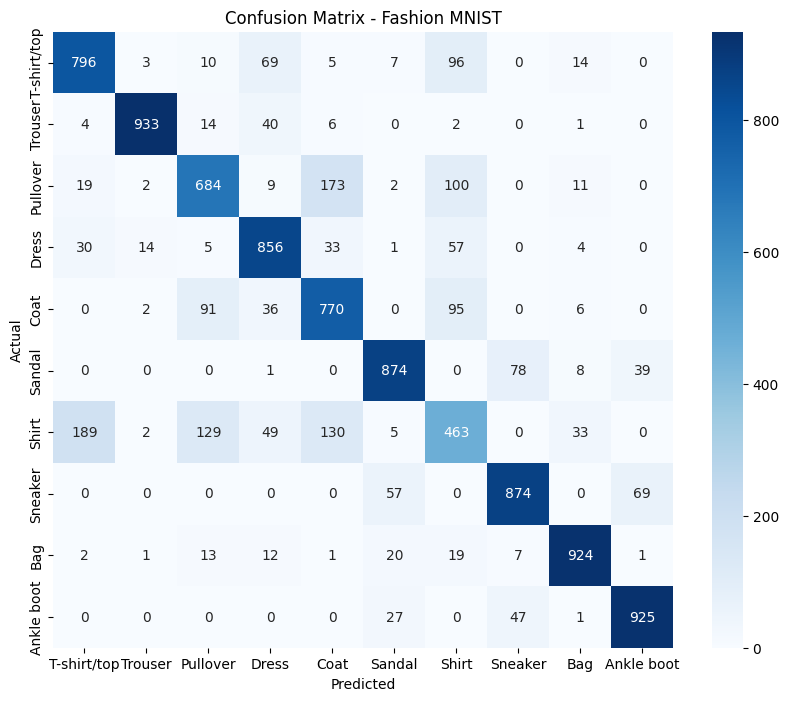

Most mistaken for 'T-shirt/top': Shirt
Most mistaken for 'Trouser': Dress
Most mistaken for 'Pullover': Coat
Most mistaken for 'Dress': Shirt
Most mistaken for 'Coat': Shirt
Most mistaken for 'Sandal': Sneaker
Most mistaken for 'Shirt': T-shirt/top
Most mistaken for 'Sneaker': Ankle boot
Most mistaken for 'Bag': Sandal
Most mistaken for 'Ankle boot': Sneaker


In [11]:
confusionMatrix(model)

# 1_2

In [5]:
model_1 = MLP(input_size=784, hidden_size=128, output_size=10)
model_2 = MLP(input_size=784, hidden_size=48, output_size=10, dropout_rate=0.2)


In [8]:
model_1.train_MLP(train_loader, num_epochs=40, learning_rate=learning_rate)


Epoch 1/40: 100%|██████████| 938/938 [00:14<00:00, 66.65it/s]


Epoch [1/40], Loss: 0.7848


Epoch 2/40: 100%|██████████| 938/938 [00:14<00:00, 65.91it/s]


Epoch [2/40], Loss: 0.7138


Epoch 3/40: 100%|██████████| 938/938 [00:14<00:00, 66.41it/s]


Epoch [3/40], Loss: 0.6693


Epoch 4/40: 100%|██████████| 938/938 [00:13<00:00, 67.07it/s]


Epoch [4/40], Loss: 0.6375


Epoch 5/40: 100%|██████████| 938/938 [00:14<00:00, 66.07it/s]


Epoch [5/40], Loss: 0.6130


Epoch 6/40: 100%|██████████| 938/938 [00:13<00:00, 69.03it/s]


Epoch [6/40], Loss: 0.5930


Epoch 7/40: 100%|██████████| 938/938 [00:13<00:00, 68.67it/s]


Epoch [7/40], Loss: 0.5763


Epoch 8/40: 100%|██████████| 938/938 [00:13<00:00, 68.99it/s]


Epoch [8/40], Loss: 0.5621


Epoch 9/40: 100%|██████████| 938/938 [00:13<00:00, 69.18it/s]


Epoch [9/40], Loss: 0.5500


Epoch 10/40: 100%|██████████| 938/938 [00:13<00:00, 68.27it/s]


Epoch [10/40], Loss: 0.5395


Epoch 11/40: 100%|██████████| 938/938 [00:13<00:00, 68.30it/s]


Epoch [11/40], Loss: 0.5301


Epoch 12/40: 100%|██████████| 938/938 [00:13<00:00, 68.78it/s]


Epoch [12/40], Loss: 0.5220


Epoch 13/40: 100%|██████████| 938/938 [00:14<00:00, 66.48it/s]


Epoch [13/40], Loss: 0.5147


Epoch 14/40: 100%|██████████| 938/938 [00:14<00:00, 66.20it/s]


Epoch [14/40], Loss: 0.5079


Epoch 15/40: 100%|██████████| 938/938 [00:13<00:00, 68.68it/s]


Epoch [15/40], Loss: 0.5020


Epoch 16/40: 100%|██████████| 938/938 [00:13<00:00, 69.13it/s]


Epoch [16/40], Loss: 0.4963


Epoch 17/40: 100%|██████████| 938/938 [00:13<00:00, 69.32it/s]


Epoch [17/40], Loss: 0.4914


Epoch 18/40: 100%|██████████| 938/938 [00:13<00:00, 68.62it/s]


Epoch [18/40], Loss: 0.4865


Epoch 19/40: 100%|██████████| 938/938 [00:13<00:00, 68.47it/s]


Epoch [19/40], Loss: 0.4823


Epoch 20/40: 100%|██████████| 938/938 [00:13<00:00, 68.95it/s]


Epoch [20/40], Loss: 0.4778


Epoch 21/40: 100%|██████████| 938/938 [00:13<00:00, 68.20it/s]


Epoch [21/40], Loss: 0.4740


Epoch 22/40: 100%|██████████| 938/938 [00:13<00:00, 69.46it/s]


Epoch [22/40], Loss: 0.4703


Epoch 23/40: 100%|██████████| 938/938 [00:13<00:00, 68.78it/s]


Epoch [23/40], Loss: 0.4667


Epoch 24/40: 100%|██████████| 938/938 [00:13<00:00, 69.54it/s]


Epoch [24/40], Loss: 0.4635


Epoch 25/40: 100%|██████████| 938/938 [00:13<00:00, 69.64it/s]


Epoch [25/40], Loss: 0.4603


Epoch 26/40: 100%|██████████| 938/938 [00:14<00:00, 66.38it/s]


Epoch [26/40], Loss: 0.4575


Epoch 27/40: 100%|██████████| 938/938 [00:14<00:00, 66.56it/s]


Epoch [27/40], Loss: 0.4545


Epoch 28/40: 100%|██████████| 938/938 [00:14<00:00, 66.93it/s]


Epoch [28/40], Loss: 0.4519


Epoch 29/40: 100%|██████████| 938/938 [00:13<00:00, 67.56it/s]


Epoch [29/40], Loss: 0.4492


Epoch 30/40: 100%|██████████| 938/938 [00:13<00:00, 67.85it/s]


Epoch [30/40], Loss: 0.4467


Epoch 31/40: 100%|██████████| 938/938 [00:13<00:00, 67.19it/s]


Epoch [31/40], Loss: 0.4442


Epoch 32/40: 100%|██████████| 938/938 [00:13<00:00, 67.79it/s]


Epoch [32/40], Loss: 0.4420


Epoch 33/40: 100%|██████████| 938/938 [00:14<00:00, 65.19it/s]


Epoch [33/40], Loss: 0.4396


Epoch 34/40: 100%|██████████| 938/938 [00:14<00:00, 66.50it/s]


Epoch [34/40], Loss: 0.4375


Epoch 35/40: 100%|██████████| 938/938 [00:13<00:00, 68.91it/s]


Epoch [35/40], Loss: 0.4353


Epoch 36/40: 100%|██████████| 938/938 [00:13<00:00, 69.05it/s]


Epoch [36/40], Loss: 0.4333


Epoch 37/40: 100%|██████████| 938/938 [00:13<00:00, 68.71it/s]


Epoch [37/40], Loss: 0.4315


Epoch 38/40: 100%|██████████| 938/938 [00:13<00:00, 68.40it/s]


Epoch [38/40], Loss: 0.4293


Epoch 39/40: 100%|██████████| 938/938 [00:14<00:00, 66.81it/s]


Epoch [39/40], Loss: 0.4276


Epoch 40/40: 100%|██████████| 938/938 [00:13<00:00, 68.83it/s]

Epoch [40/40], Loss: 0.4256


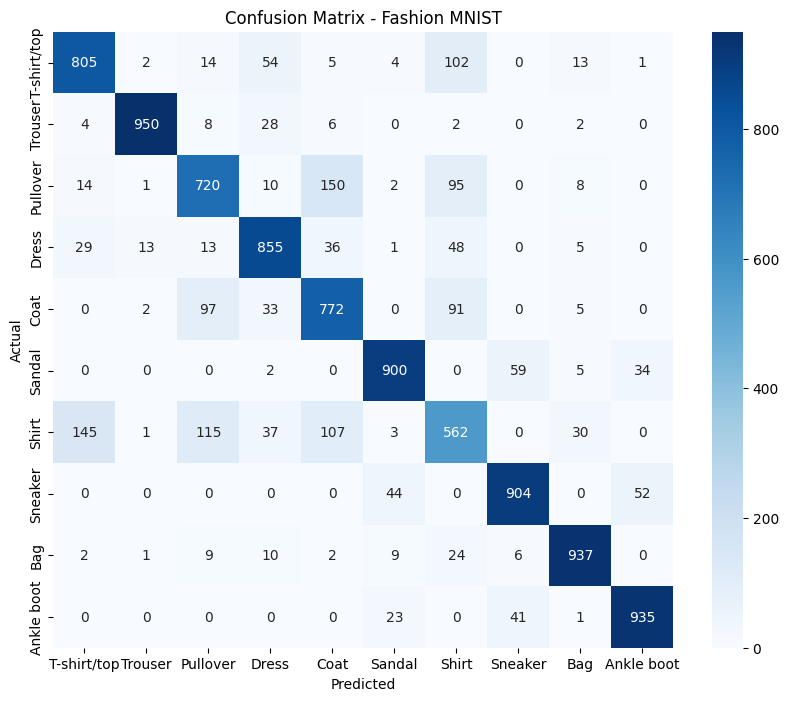

Most mistaken for 'T-shirt/top': Shirt
Most mistaken for 'Trouser': Dress
Most mistaken for 'Pullover': Coat
Most mistaken for 'Dress': Shirt
Most mistaken for 'Coat': Pullover
Most mistaken for 'Sandal': Sneaker
Most mistaken for 'Shirt': T-shirt/top
Most mistaken for 'Sneaker': Ankle boot
Most mistaken for 'Bag': Shirt
Most mistaken for 'Ankle boot': Sneaker


In [12]:
confusionMatrix(model_1)


In [13]:
model_2.train_MLP(train_loader, num_epochs=40, learning_rate=learning_rate, l2_lambda=0.0001)


Epoch 1/40: 100%|██████████| 938/938 [00:14<00:00, 63.59it/s]


Epoch [1/40], Loss: 1.7307


Epoch 2/40: 100%|██████████| 938/938 [00:14<00:00, 66.83it/s]


Epoch [2/40], Loss: 1.1321


Epoch 3/40: 100%|██████████| 938/938 [00:13<00:00, 67.12it/s]


Epoch [3/40], Loss: 0.9267


Epoch 4/40: 100%|██████████| 938/938 [00:13<00:00, 67.36it/s]


Epoch [4/40], Loss: 0.8324


Epoch 5/40: 100%|██████████| 938/938 [00:13<00:00, 67.86it/s]


Epoch [5/40], Loss: 0.7754


Epoch 6/40: 100%|██████████| 938/938 [00:13<00:00, 67.64it/s]


Epoch [6/40], Loss: 0.7375


Epoch 7/40: 100%|██████████| 938/938 [00:14<00:00, 66.93it/s]


Epoch [7/40], Loss: 0.7082


Epoch 8/40: 100%|██████████| 938/938 [00:14<00:00, 66.99it/s]


Epoch [8/40], Loss: 0.6861


Epoch 9/40: 100%|██████████| 938/938 [00:13<00:00, 67.52it/s]


Epoch [9/40], Loss: 0.6670


Epoch 10/40: 100%|██████████| 938/938 [00:13<00:00, 67.66it/s]


Epoch [10/40], Loss: 0.6490


Epoch 11/40: 100%|██████████| 938/938 [00:13<00:00, 67.19it/s]


Epoch [11/40], Loss: 0.6354


Epoch 12/40: 100%|██████████| 938/938 [00:14<00:00, 66.54it/s]


Epoch [12/40], Loss: 0.6216


Epoch 13/40: 100%|██████████| 938/938 [00:13<00:00, 67.33it/s]


Epoch [13/40], Loss: 0.6087


Epoch 14/40: 100%|██████████| 938/938 [00:13<00:00, 67.46it/s]


Epoch [14/40], Loss: 0.6023


Epoch 15/40: 100%|██████████| 938/938 [00:13<00:00, 67.31it/s]


Epoch [15/40], Loss: 0.5918


Epoch 16/40: 100%|██████████| 938/938 [00:14<00:00, 66.29it/s]


Epoch [16/40], Loss: 0.5834


Epoch 17/40: 100%|██████████| 938/938 [00:14<00:00, 64.58it/s]


Epoch [17/40], Loss: 0.5751


Epoch 18/40: 100%|██████████| 938/938 [00:13<00:00, 67.25it/s]


Epoch [18/40], Loss: 0.5677


Epoch 19/40: 100%|██████████| 938/938 [00:13<00:00, 67.78it/s]


Epoch [19/40], Loss: 0.5630


Epoch 20/40: 100%|██████████| 938/938 [00:13<00:00, 67.46it/s]


Epoch [20/40], Loss: 0.5567


Epoch 21/40: 100%|██████████| 938/938 [00:13<00:00, 67.12it/s]


Epoch [21/40], Loss: 0.5508


Epoch 22/40: 100%|██████████| 938/938 [00:13<00:00, 67.45it/s]


Epoch [22/40], Loss: 0.5462


Epoch 23/40: 100%|██████████| 938/938 [00:13<00:00, 67.50it/s]


Epoch [23/40], Loss: 0.5407


Epoch 24/40: 100%|██████████| 938/938 [00:13<00:00, 67.06it/s]


Epoch [24/40], Loss: 0.5366


Epoch 25/40: 100%|██████████| 938/938 [00:13<00:00, 67.58it/s]


Epoch [25/40], Loss: 0.5311


Epoch 26/40: 100%|██████████| 938/938 [00:13<00:00, 67.69it/s]


Epoch [26/40], Loss: 0.5278


Epoch 27/40: 100%|██████████| 938/938 [00:13<00:00, 67.48it/s]


Epoch [27/40], Loss: 0.5234


Epoch 28/40: 100%|██████████| 938/938 [00:13<00:00, 67.45it/s]


Epoch [28/40], Loss: 0.5218


Epoch 29/40: 100%|██████████| 938/938 [00:13<00:00, 67.10it/s]


Epoch [29/40], Loss: 0.5174


Epoch 30/40: 100%|██████████| 938/938 [00:13<00:00, 67.27it/s]


Epoch [30/40], Loss: 0.5130


Epoch 31/40: 100%|██████████| 938/938 [00:13<00:00, 67.60it/s]


Epoch [31/40], Loss: 0.5112


Epoch 32/40: 100%|██████████| 938/938 [00:13<00:00, 67.36it/s]


Epoch [32/40], Loss: 0.5071


Epoch 33/40: 100%|██████████| 938/938 [00:13<00:00, 67.24it/s]


Epoch [33/40], Loss: 0.5051


Epoch 34/40: 100%|██████████| 938/938 [00:14<00:00, 64.33it/s]


Epoch [34/40], Loss: 0.5008


Epoch 35/40: 100%|██████████| 938/938 [01:16<00:00, 12.21it/s]


Epoch [35/40], Loss: 0.4986


Epoch 36/40: 100%|██████████| 938/938 [00:14<00:00, 66.29it/s]


Epoch [36/40], Loss: 0.4957


Epoch 37/40: 100%|██████████| 938/938 [00:14<00:00, 65.47it/s]


Epoch [37/40], Loss: 0.4931


Epoch 38/40: 100%|██████████| 938/938 [00:14<00:00, 66.89it/s]


Epoch [38/40], Loss: 0.4906


Epoch 39/40: 100%|██████████| 938/938 [00:14<00:00, 66.55it/s]


Epoch [39/40], Loss: 0.4898


Epoch 40/40: 100%|██████████| 938/938 [00:14<00:00, 66.31it/s]

Epoch [40/40], Loss: 0.4878


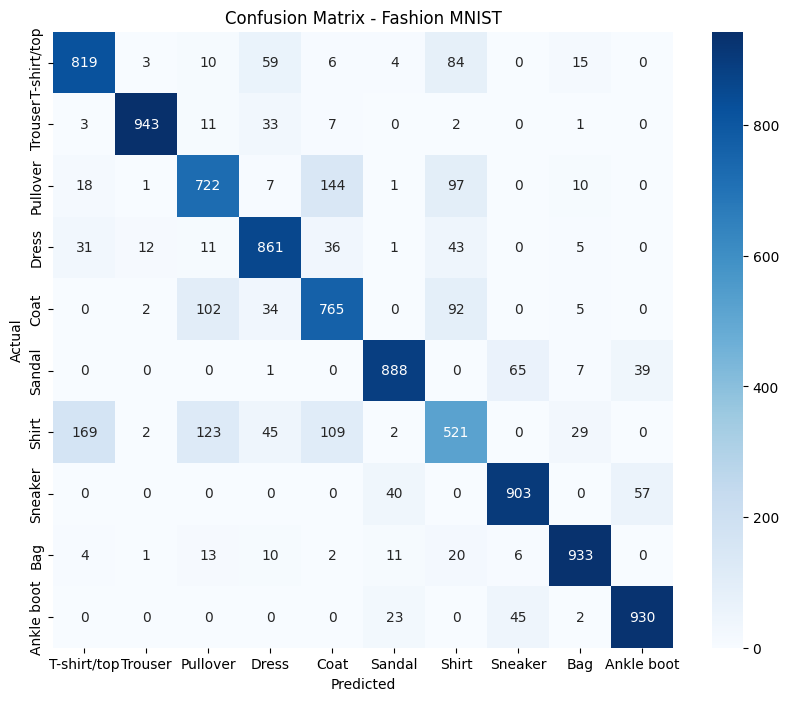

Most mistaken for 'T-shirt/top': Shirt
Most mistaken for 'Trouser': Dress
Most mistaken for 'Pullover': Coat
Most mistaken for 'Dress': Shirt
Most mistaken for 'Coat': Pullover
Most mistaken for 'Sandal': Sneaker
Most mistaken for 'Shirt': T-shirt/top
Most mistaken for 'Sneaker': Ankle boot
Most mistaken for 'Bag': Shirt
Most mistaken for 'Ankle boot': Sneaker


In [14]:
confusionMatrix(model_2)

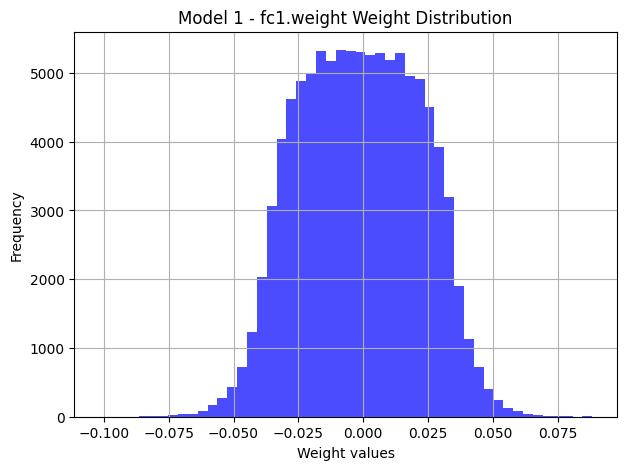

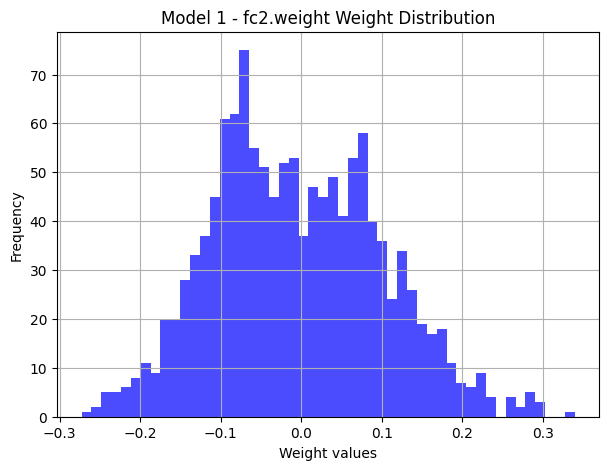

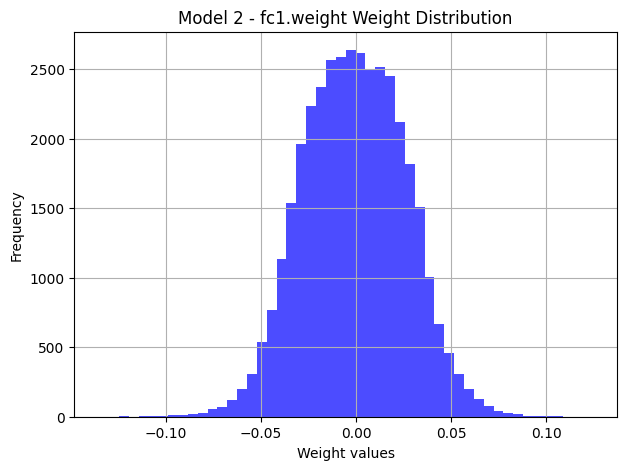

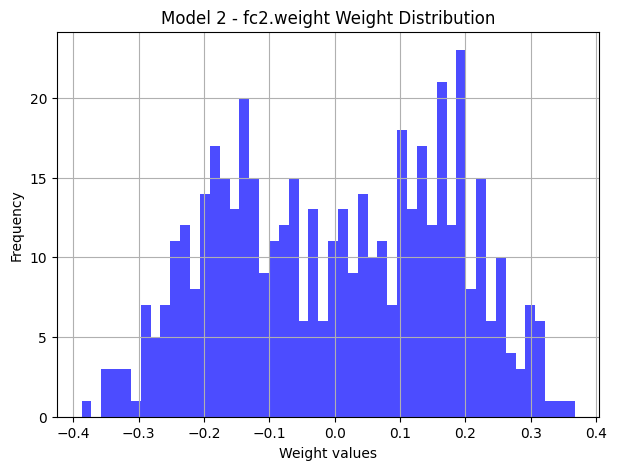

In [15]:
# Define a function to plot histograms of model weights
def plot_weight_histograms(model, model_name):
    # Loop through each layer in the model
    for name, param in model.named_parameters():
        if 'weight' in name:  # Filter for weights only
            # Plot histogram for the layer's weights
            plt.figure(figsize=(7, 5))
            plt.hist(param.data.cpu().numpy().flatten(), bins=50, color='blue', alpha=0.7)
            plt.title(f'{model_name} - {name} Weight Distribution')
            plt.xlabel('Weight values')
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()

# Plot weight histograms for each model
plot_weight_histograms(model_1, 'Model 1')
plot_weight_histograms(model_2, 'Model 2')


Epoch 1/40: 100%|██████████| 938/938 [00:14<00:00, 64.20it/s]


Epoch [1/40], Loss: 0.4987


Epoch 2/40: 100%|██████████| 938/938 [00:14<00:00, 64.06it/s]


Epoch [2/40], Loss: 0.3786


Epoch 3/40: 100%|██████████| 938/938 [00:14<00:00, 64.41it/s]


Epoch [3/40], Loss: 0.3432


Epoch 4/40: 100%|██████████| 938/938 [00:14<00:00, 63.05it/s]


Epoch [4/40], Loss: 0.3175


Epoch 5/40: 100%|██████████| 938/938 [00:14<00:00, 63.09it/s]


Epoch [5/40], Loss: 0.3009


Epoch 6/40: 100%|██████████| 938/938 [00:14<00:00, 63.05it/s]


Epoch [6/40], Loss: 0.2861


Epoch 7/40: 100%|██████████| 938/938 [00:14<00:00, 62.86it/s]


Epoch [7/40], Loss: 0.2703


Epoch 8/40: 100%|██████████| 938/938 [00:14<00:00, 63.49it/s]


Epoch [8/40], Loss: 0.2616


Epoch 9/40: 100%|██████████| 938/938 [00:14<00:00, 64.91it/s]


Epoch [9/40], Loss: 0.2482


Epoch 10/40: 100%|██████████| 938/938 [00:14<00:00, 65.19it/s]


Epoch [10/40], Loss: 0.2413


Epoch 11/40: 100%|██████████| 938/938 [00:14<00:00, 65.06it/s]


Epoch [11/40], Loss: 0.2318


Epoch 12/40: 100%|██████████| 938/938 [00:14<00:00, 63.06it/s]


Epoch [12/40], Loss: 0.2247


Epoch 13/40: 100%|██████████| 938/938 [00:14<00:00, 64.69it/s]


Epoch [13/40], Loss: 0.2171


Epoch 14/40: 100%|██████████| 938/938 [00:14<00:00, 64.68it/s]


Epoch [14/40], Loss: 0.2116


Epoch 15/40: 100%|██████████| 938/938 [00:14<00:00, 63.45it/s]


Epoch [15/40], Loss: 0.2026


Epoch 16/40: 100%|██████████| 938/938 [00:14<00:00, 64.33it/s]


Epoch [16/40], Loss: 0.1978


Epoch 17/40: 100%|██████████| 938/938 [00:15<00:00, 61.59it/s]


Epoch [17/40], Loss: 0.1923


Epoch 18/40: 100%|██████████| 938/938 [00:14<00:00, 63.08it/s]


Epoch [18/40], Loss: 0.1879


Epoch 19/40: 100%|██████████| 938/938 [00:14<00:00, 64.26it/s]


Epoch [19/40], Loss: 0.1808


Epoch 20/40: 100%|██████████| 938/938 [00:14<00:00, 64.49it/s]


Epoch [20/40], Loss: 0.1777


Epoch 21/40: 100%|██████████| 938/938 [00:14<00:00, 63.85it/s]


Epoch [21/40], Loss: 0.1715


Epoch 22/40: 100%|██████████| 938/938 [00:14<00:00, 62.63it/s]


Epoch [22/40], Loss: 0.1652


Epoch 23/40: 100%|██████████| 938/938 [00:14<00:00, 64.06it/s]


Epoch [23/40], Loss: 0.1622


Epoch 24/40: 100%|██████████| 938/938 [00:14<00:00, 64.09it/s]


Epoch [24/40], Loss: 0.1566


Epoch 25/40: 100%|██████████| 938/938 [00:14<00:00, 62.64it/s]


Epoch [25/40], Loss: 0.1534


Epoch 26/40: 100%|██████████| 938/938 [00:14<00:00, 63.33it/s]


Epoch [26/40], Loss: 0.1511


Epoch 27/40: 100%|██████████| 938/938 [00:14<00:00, 63.30it/s]


Epoch [27/40], Loss: 0.1473


Epoch 28/40: 100%|██████████| 938/938 [00:14<00:00, 63.17it/s]


Epoch [28/40], Loss: 0.1441


Epoch 29/40: 100%|██████████| 938/938 [00:14<00:00, 62.94it/s]


Epoch [29/40], Loss: 0.1377


Epoch 30/40: 100%|██████████| 938/938 [00:14<00:00, 63.95it/s]


Epoch [30/40], Loss: 0.1359


Epoch 31/40: 100%|██████████| 938/938 [00:14<00:00, 64.93it/s]


Epoch [31/40], Loss: 0.1321


Epoch 32/40: 100%|██████████| 938/938 [00:14<00:00, 63.78it/s]


Epoch [32/40], Loss: 0.1283


Epoch 33/40: 100%|██████████| 938/938 [00:14<00:00, 63.24it/s]


Epoch [33/40], Loss: 0.1272


Epoch 34/40: 100%|██████████| 938/938 [00:14<00:00, 64.44it/s]


Epoch [34/40], Loss: 0.1228


Epoch 35/40: 100%|██████████| 938/938 [00:14<00:00, 64.43it/s]


Epoch [35/40], Loss: 0.1202


Epoch 36/40: 100%|██████████| 938/938 [00:14<00:00, 63.87it/s]


Epoch [36/40], Loss: 0.1194


Epoch 37/40: 100%|██████████| 938/938 [00:14<00:00, 64.64it/s]


Epoch [37/40], Loss: 0.1155


Epoch 38/40: 100%|██████████| 938/938 [00:14<00:00, 64.38it/s]


Epoch [38/40], Loss: 0.1117


Epoch 39/40: 100%|██████████| 938/938 [00:14<00:00, 63.79it/s]


Epoch [39/40], Loss: 0.1100


Epoch 40/40: 100%|██████████| 938/938 [00:14<00:00, 63.51it/s]


Epoch [40/40], Loss: 0.1081


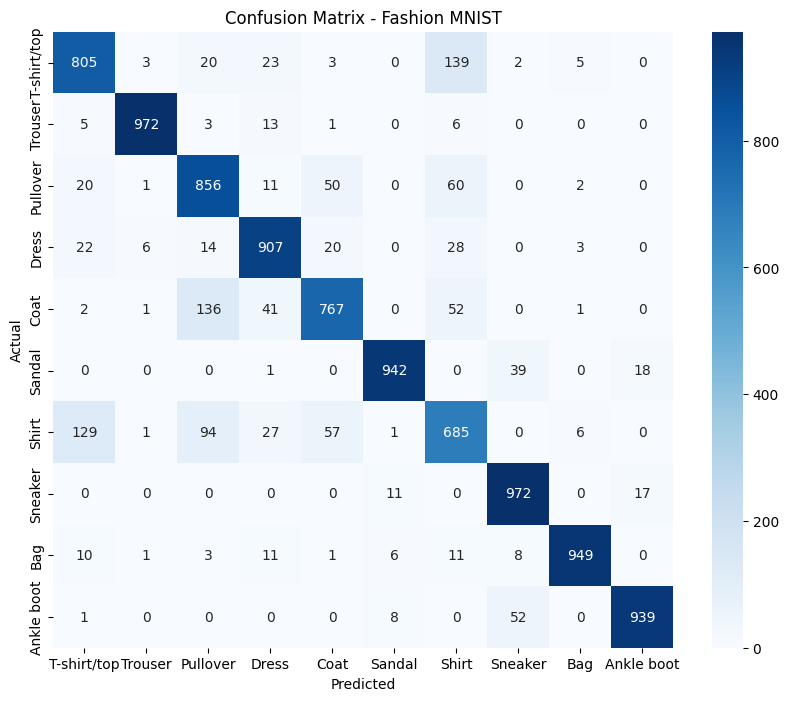

Most mistaken for 'T-shirt/top': Shirt
Most mistaken for 'Trouser': Dress
Most mistaken for 'Pullover': Shirt
Most mistaken for 'Dress': Shirt
Most mistaken for 'Coat': Pullover
Most mistaken for 'Sandal': Sneaker
Most mistaken for 'Shirt': T-shirt/top
Most mistaken for 'Sneaker': Ankle boot
Most mistaken for 'Bag': Dress
Most mistaken for 'Ankle boot': Sneaker


In [16]:
model_1_with_optimizer = MLP(input_size=784, hidden_size=128, output_size=10)
optimizer = optim.Adam(model_1_with_optimizer.parameters(), lr=learning_rate)
model_1_with_optimizer.train_MLP(train_loader, num_epochs=40, learning_rate=learning_rate, optimizer=optimizer)

confusionMatrix(model_1_with_optimizer)


# 1_3

Epoch 1/10: 100%|██████████| 938/938 [00:14<00:00, 66.07it/s]


Epoch [1/10], Loss: 0.5948


Epoch 2/10: 100%|██████████| 938/938 [00:14<00:00, 65.21it/s]


Epoch [2/10], Loss: 0.4539


Epoch 3/10: 100%|██████████| 938/938 [00:14<00:00, 64.71it/s]


Epoch [3/10], Loss: 0.4201


Epoch 4/10: 100%|██████████| 938/938 [00:14<00:00, 64.54it/s]


Epoch [4/10], Loss: 0.3988


Epoch 5/10: 100%|██████████| 938/938 [00:14<00:00, 64.28it/s]


Epoch [5/10], Loss: 0.3885


Epoch 6/10: 100%|██████████| 938/938 [00:14<00:00, 64.54it/s]


Epoch [6/10], Loss: 0.3698


Epoch 7/10: 100%|██████████| 938/938 [00:14<00:00, 65.44it/s]


Epoch [7/10], Loss: 0.3660


Epoch 8/10: 100%|██████████| 938/938 [00:14<00:00, 65.04it/s]


Epoch [8/10], Loss: 0.3578


Epoch 9/10: 100%|██████████| 938/938 [00:15<00:00, 62.36it/s]


Epoch [9/10], Loss: 0.3515


Epoch 10/10: 100%|██████████| 938/938 [00:14<00:00, 63.97it/s]


Epoch [10/10], Loss: 0.3463


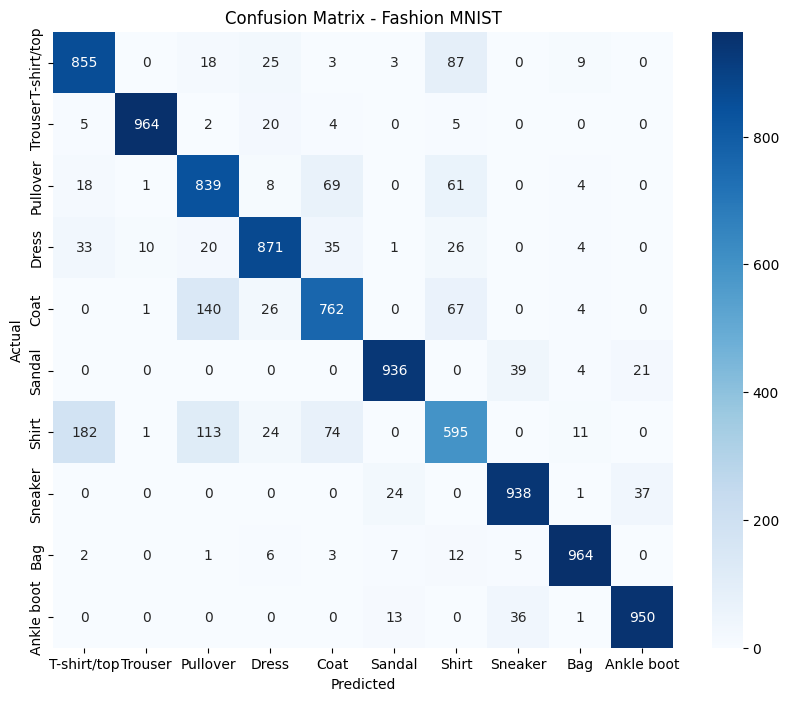

Most mistaken for 'T-shirt/top': Shirt
Most mistaken for 'Trouser': Dress
Most mistaken for 'Pullover': Coat
Most mistaken for 'Dress': Coat
Most mistaken for 'Coat': Pullover
Most mistaken for 'Sandal': Sneaker
Most mistaken for 'Shirt': T-shirt/top
Most mistaken for 'Sneaker': Ankle boot
Most mistaken for 'Bag': Shirt
Most mistaken for 'Ankle boot': Sneaker


In [17]:
model_Adam = MLP(input_size=784, hidden_size=48, output_size=10, dropout_rate=0.2)
optimizer = optim.Adam(model_Adam.parameters(), lr=learning_rate, weight_decay=0.0001)
model_Adam.train_MLP(train_loader, num_epochs=10, learning_rate=learning_rate, optimizer=optimizer)

confusionMatrix(model_Adam)


Epoch 1/10: 100%|██████████| 938/938 [00:14<00:00, 65.70it/s]


Epoch [1/10], Loss: 0.5884


Epoch 2/10: 100%|██████████| 938/938 [00:14<00:00, 65.42it/s]


Epoch [2/10], Loss: 0.4485


Epoch 3/10: 100%|██████████| 938/938 [00:14<00:00, 65.87it/s]


Epoch [3/10], Loss: 0.4144


Epoch 4/10: 100%|██████████| 938/938 [00:14<00:00, 65.95it/s]


Epoch [4/10], Loss: 0.3932


Epoch 5/10: 100%|██████████| 938/938 [00:14<00:00, 62.72it/s]


Epoch [5/10], Loss: 0.3836


Epoch 6/10: 100%|██████████| 938/938 [00:14<00:00, 63.96it/s]


Epoch [6/10], Loss: 0.3704


Epoch 7/10: 100%|██████████| 938/938 [00:14<00:00, 64.19it/s]


Epoch [7/10], Loss: 0.3633


Epoch 8/10: 100%|██████████| 938/938 [00:15<00:00, 62.46it/s]


Epoch [8/10], Loss: 0.3582


Epoch 9/10: 100%|██████████| 938/938 [00:15<00:00, 61.95it/s]


Epoch [9/10], Loss: 0.3510


Epoch 10/10: 100%|██████████| 938/938 [00:14<00:00, 66.37it/s]


Epoch [10/10], Loss: 0.3451


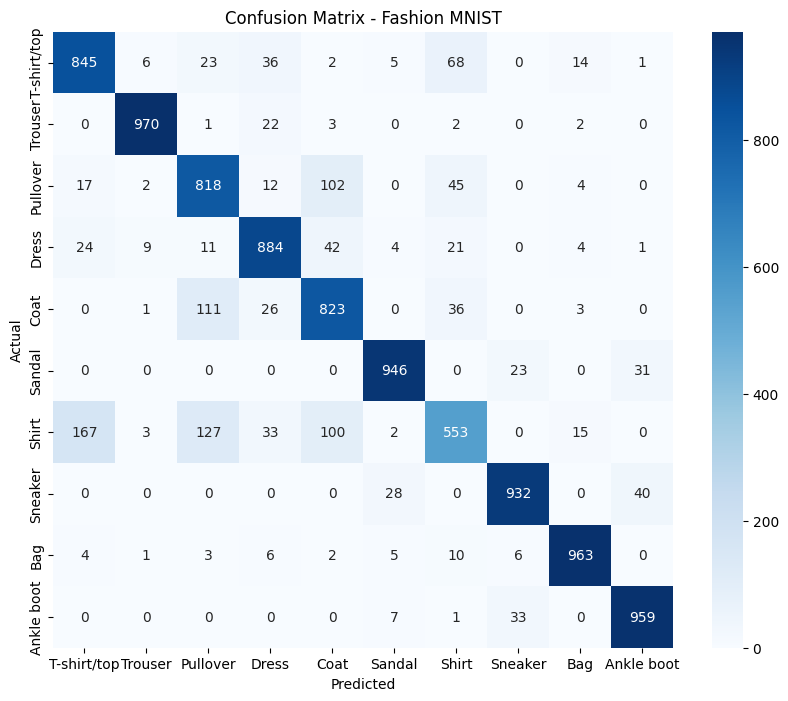

Most mistaken for 'T-shirt/top': Shirt
Most mistaken for 'Trouser': Dress
Most mistaken for 'Pullover': Coat
Most mistaken for 'Dress': Coat
Most mistaken for 'Coat': Pullover
Most mistaken for 'Sandal': Ankle boot
Most mistaken for 'Shirt': T-shirt/top
Most mistaken for 'Sneaker': Ankle boot
Most mistaken for 'Bag': Shirt
Most mistaken for 'Ankle boot': Sneaker


In [18]:
model_NAdam = MLP(input_size=784, hidden_size=48, output_size=10, dropout_rate=0.2)
optimizer = optim.NAdam(model_NAdam.parameters(), lr=learning_rate, weight_decay=0.0001)
model_NAdam.train_MLP(train_loader, num_epochs=10, learning_rate=learning_rate, optimizer=optimizer)

confusionMatrix(model_NAdam)


Epoch 1/10: 100%|██████████| 938/938 [00:14<00:00, 66.51it/s]


Epoch [1/10], Loss: 0.5747


Epoch 2/10: 100%|██████████| 938/938 [00:14<00:00, 64.88it/s]


Epoch [2/10], Loss: 0.4513


Epoch 3/10: 100%|██████████| 938/938 [00:14<00:00, 65.38it/s]


Epoch [3/10], Loss: 0.4211


Epoch 4/10: 100%|██████████| 938/938 [00:14<00:00, 63.59it/s]


Epoch [4/10], Loss: 0.3980


Epoch 5/10: 100%|██████████| 938/938 [00:14<00:00, 64.87it/s]


Epoch [5/10], Loss: 0.3844


Epoch 6/10: 100%|██████████| 938/938 [00:14<00:00, 65.16it/s]


Epoch [6/10], Loss: 0.3727


Epoch 7/10: 100%|██████████| 938/938 [00:14<00:00, 65.44it/s]


Epoch [7/10], Loss: 0.3656


Epoch 8/10: 100%|██████████| 938/938 [00:14<00:00, 65.89it/s]


Epoch [8/10], Loss: 0.3557


Epoch 9/10: 100%|██████████| 938/938 [00:14<00:00, 66.14it/s]


Epoch [9/10], Loss: 0.3509


Epoch 10/10: 100%|██████████| 938/938 [00:14<00:00, 65.47it/s]


Epoch [10/10], Loss: 0.3467


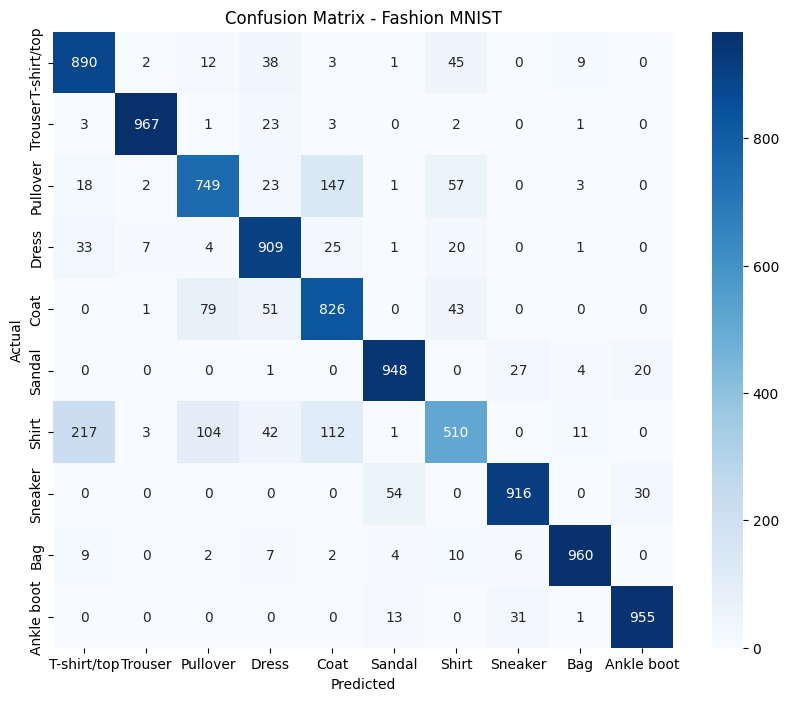

Most mistaken for 'T-shirt/top': Shirt
Most mistaken for 'Trouser': Dress
Most mistaken for 'Pullover': Coat
Most mistaken for 'Dress': T-shirt/top
Most mistaken for 'Coat': Pullover
Most mistaken for 'Sandal': Sneaker
Most mistaken for 'Shirt': T-shirt/top
Most mistaken for 'Sneaker': Sandal
Most mistaken for 'Bag': Shirt
Most mistaken for 'Ankle boot': Sneaker


In [19]:
model_RMSprop = MLP(input_size=784, hidden_size=48, output_size=10, dropout_rate=0.2)
optimizer = optim.RMSprop(model_RMSprop.parameters(), lr=learning_rate, weight_decay=0.0001)
model_RMSprop.train_MLP(train_loader, num_epochs=10, learning_rate=learning_rate, optimizer=optimizer)

confusionMatrix(model_RMSprop)


# 1_4

Epoch 1/5: 100%|██████████| 938/938 [00:15<00:00, 61.96it/s]


Epoch [1/5], Loss: 0.7656, Accuracy: 0.7105


Epoch 2/5: 100%|██████████| 938/938 [00:15<00:00, 61.95it/s]


Epoch [2/5], Loss: 0.6632, Accuracy: 0.7545


Epoch 3/5: 100%|██████████| 938/938 [00:14<00:00, 63.28it/s]


Epoch [3/5], Loss: 0.6660, Accuracy: 0.7513


Epoch 4/5: 100%|██████████| 938/938 [00:14<00:00, 63.73it/s]


Epoch [4/5], Loss: 0.6398, Accuracy: 0.7626


Epoch 5/5: 100%|██████████| 938/938 [00:14<00:00, 64.03it/s]


Epoch [5/5], Loss: 0.6382, Accuracy: 0.7639
Learning Rate: 0.01, Hidden Layer Size: 16, Number of Epochs: 5


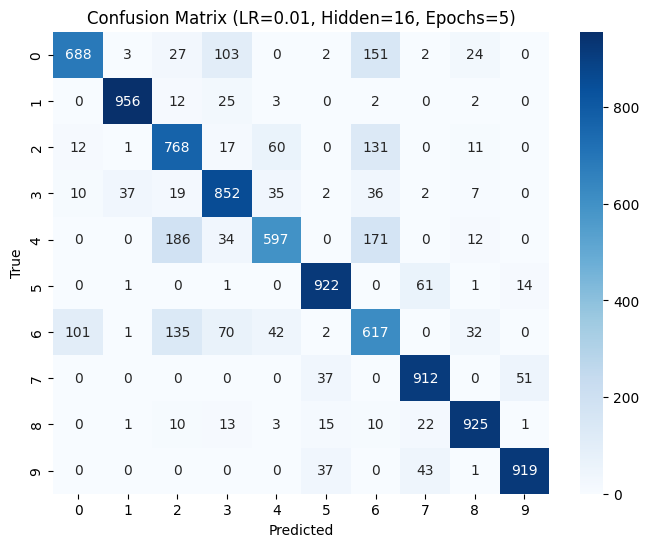

Epoch 1/10: 100%|██████████| 938/938 [00:14<00:00, 64.99it/s]


Epoch [1/10], Loss: 0.8171, Accuracy: 0.6866


Epoch 2/10: 100%|██████████| 938/938 [00:14<00:00, 63.58it/s]


Epoch [2/10], Loss: 0.7093, Accuracy: 0.7303


Epoch 3/10: 100%|██████████| 938/938 [00:14<00:00, 63.56it/s]


Epoch [3/10], Loss: 0.7006, Accuracy: 0.7355


Epoch 4/10: 100%|██████████| 938/938 [00:14<00:00, 66.15it/s]


Epoch [4/10], Loss: 0.6896, Accuracy: 0.7458


Epoch 5/10: 100%|██████████| 938/938 [00:14<00:00, 64.38it/s]


Epoch [5/10], Loss: 0.6825, Accuracy: 0.7458


Epoch 6/10: 100%|██████████| 938/938 [00:14<00:00, 65.46it/s]


Epoch [6/10], Loss: 0.6751, Accuracy: 0.7487


Epoch 7/10: 100%|██████████| 938/938 [00:14<00:00, 65.16it/s]


Epoch [7/10], Loss: 0.6730, Accuracy: 0.7489


Epoch 8/10: 100%|██████████| 938/938 [00:14<00:00, 64.48it/s]


Epoch [8/10], Loss: 0.6908, Accuracy: 0.7437


Epoch 9/10: 100%|██████████| 938/938 [00:14<00:00, 65.21it/s]


Epoch [9/10], Loss: 0.6737, Accuracy: 0.7519


Epoch 10/10: 100%|██████████| 938/938 [00:14<00:00, 65.14it/s]


Epoch [10/10], Loss: 0.6597, Accuracy: 0.7553
Learning Rate: 0.01, Hidden Layer Size: 16, Number of Epochs: 10


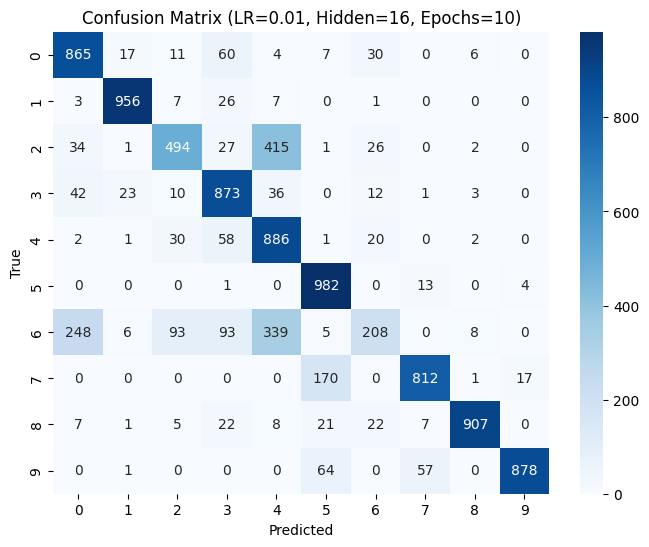

Epoch 1/15: 100%|██████████| 938/938 [00:14<00:00, 64.81it/s]


Epoch [1/15], Loss: 0.8196, Accuracy: 0.6888


Epoch 2/15: 100%|██████████| 938/938 [00:14<00:00, 64.46it/s]


Epoch [2/15], Loss: 0.7123, Accuracy: 0.7338


Epoch 3/15: 100%|██████████| 938/938 [00:14<00:00, 63.36it/s]


Epoch [3/15], Loss: 0.6959, Accuracy: 0.7385


Epoch 4/15: 100%|██████████| 938/938 [00:15<00:00, 61.07it/s]


Epoch [4/15], Loss: 0.6922, Accuracy: 0.7431


Epoch 5/15: 100%|██████████| 938/938 [00:15<00:00, 60.45it/s]


Epoch [5/15], Loss: 0.6853, Accuracy: 0.7426


Epoch 6/15: 100%|██████████| 938/938 [00:14<00:00, 64.23it/s]


Epoch [6/15], Loss: 0.6732, Accuracy: 0.7473


Epoch 7/15: 100%|██████████| 938/938 [00:14<00:00, 65.88it/s]


Epoch [7/15], Loss: 0.6745, Accuracy: 0.7470


Epoch 8/15: 100%|██████████| 938/938 [00:14<00:00, 66.11it/s]


Epoch [8/15], Loss: 0.6677, Accuracy: 0.7470


Epoch 9/15: 100%|██████████| 938/938 [00:14<00:00, 66.42it/s]


Epoch [9/15], Loss: 0.6650, Accuracy: 0.7511


Epoch 10/15: 100%|██████████| 938/938 [00:14<00:00, 66.27it/s]


Epoch [10/15], Loss: 0.6720, Accuracy: 0.7462


Epoch 11/15: 100%|██████████| 938/938 [00:14<00:00, 66.25it/s]


Epoch [11/15], Loss: 0.6638, Accuracy: 0.7504


Epoch 12/15: 100%|██████████| 938/938 [00:14<00:00, 65.90it/s]


Epoch [12/15], Loss: 0.6608, Accuracy: 0.7503


Epoch 13/15: 100%|██████████| 938/938 [00:14<00:00, 66.07it/s]


Epoch [13/15], Loss: 0.6716, Accuracy: 0.7465


Epoch 14/15: 100%|██████████| 938/938 [00:14<00:00, 66.57it/s]


Epoch [14/15], Loss: 0.6586, Accuracy: 0.7547


Epoch 15/15: 100%|██████████| 938/938 [00:14<00:00, 64.99it/s]


Epoch [15/15], Loss: 0.6679, Accuracy: 0.7515
Learning Rate: 0.01, Hidden Layer Size: 16, Number of Epochs: 15


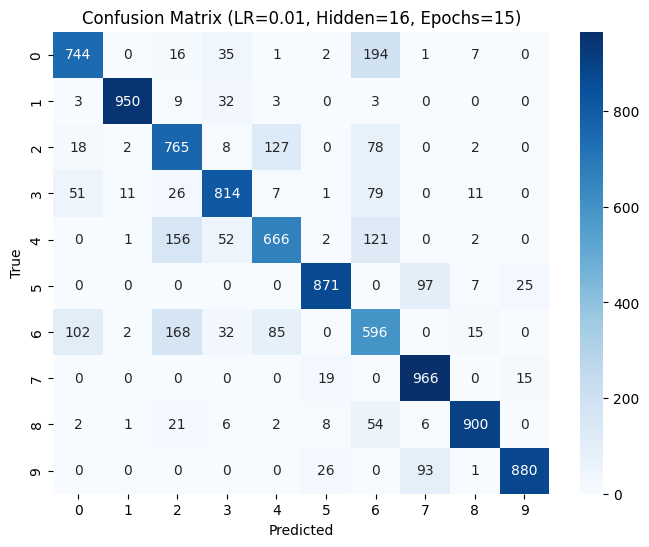

Epoch 1/5: 100%|██████████| 938/938 [00:14<00:00, 63.69it/s]


Epoch [1/5], Loss: 0.6780, Accuracy: 0.7504


Epoch 2/5: 100%|██████████| 938/938 [00:14<00:00, 63.54it/s]


Epoch [2/5], Loss: 0.6034, Accuracy: 0.7830


Epoch 3/5: 100%|██████████| 938/938 [00:14<00:00, 65.28it/s]


Epoch [3/5], Loss: 0.5965, Accuracy: 0.7856


Epoch 4/5: 100%|██████████| 938/938 [00:14<00:00, 63.67it/s]


Epoch [4/5], Loss: 0.5937, Accuracy: 0.7859


Epoch 5/5: 100%|██████████| 938/938 [00:14<00:00, 63.40it/s]


Epoch [5/5], Loss: 0.5851, Accuracy: 0.7891
Learning Rate: 0.01, Hidden Layer Size: 48, Number of Epochs: 5


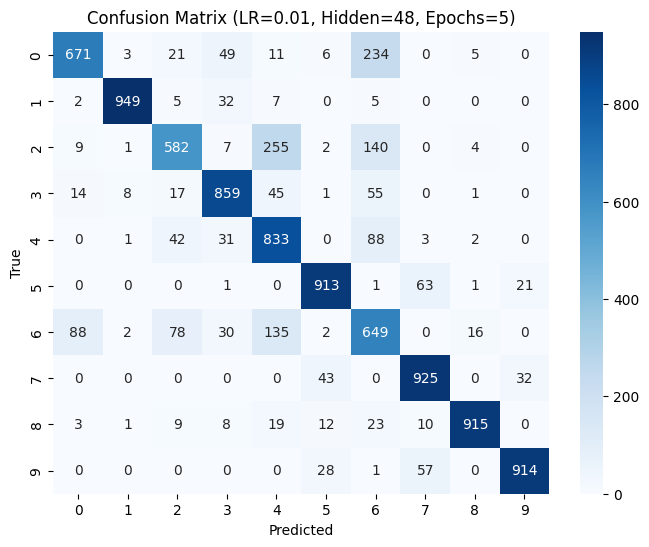

Epoch 1/10: 100%|██████████| 938/938 [00:14<00:00, 64.83it/s]


Epoch [1/10], Loss: 0.6743, Accuracy: 0.7557


Epoch 2/10: 100%|██████████| 938/938 [00:14<00:00, 65.23it/s]


Epoch [2/10], Loss: 0.6033, Accuracy: 0.7829


Epoch 3/10: 100%|██████████| 938/938 [00:14<00:00, 65.42it/s]


Epoch [3/10], Loss: 0.5782, Accuracy: 0.7921


Epoch 4/10: 100%|██████████| 938/938 [00:14<00:00, 65.39it/s]


Epoch [4/10], Loss: 0.5869, Accuracy: 0.7889


Epoch 5/10: 100%|██████████| 938/938 [00:14<00:00, 65.58it/s]


Epoch [5/10], Loss: 0.5827, Accuracy: 0.7906


Epoch 6/10: 100%|██████████| 938/938 [00:14<00:00, 62.65it/s]


Epoch [6/10], Loss: 0.5757, Accuracy: 0.7937


Epoch 7/10: 100%|██████████| 938/938 [00:14<00:00, 63.46it/s]


Epoch [7/10], Loss: 0.5679, Accuracy: 0.7957


Epoch 8/10: 100%|██████████| 938/938 [00:14<00:00, 64.12it/s]


Epoch [8/10], Loss: 0.5961, Accuracy: 0.7852


Epoch 9/10: 100%|██████████| 938/938 [00:14<00:00, 64.44it/s]


Epoch [9/10], Loss: 0.5650, Accuracy: 0.7966


Epoch 10/10: 100%|██████████| 938/938 [00:14<00:00, 64.64it/s]


Epoch [10/10], Loss: 0.5707, Accuracy: 0.7973
Learning Rate: 0.01, Hidden Layer Size: 48, Number of Epochs: 10


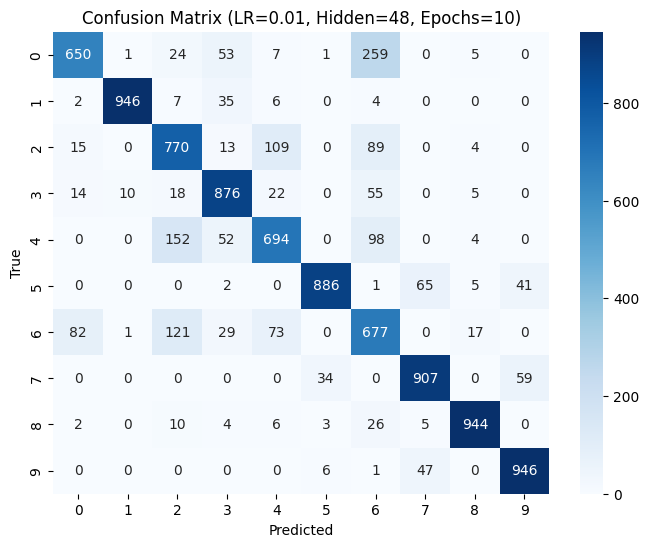

Epoch 1/15: 100%|██████████| 938/938 [00:14<00:00, 63.29it/s]


Epoch [1/15], Loss: 0.6685, Accuracy: 0.7556


Epoch 2/15: 100%|██████████| 938/938 [00:14<00:00, 65.51it/s]


Epoch [2/15], Loss: 0.6032, Accuracy: 0.7826


Epoch 3/15: 100%|██████████| 938/938 [00:14<00:00, 64.66it/s]


Epoch [3/15], Loss: 0.5868, Accuracy: 0.7907


Epoch 4/15: 100%|██████████| 938/938 [00:14<00:00, 64.54it/s]


Epoch [4/15], Loss: 0.5852, Accuracy: 0.7900


Epoch 5/15: 100%|██████████| 938/938 [00:14<00:00, 64.45it/s]


Epoch [5/15], Loss: 0.5783, Accuracy: 0.7948


Epoch 6/15: 100%|██████████| 938/938 [00:14<00:00, 65.08it/s]


Epoch [6/15], Loss: 0.5800, Accuracy: 0.7932


Epoch 7/15: 100%|██████████| 938/938 [00:14<00:00, 64.62it/s]


Epoch [7/15], Loss: 0.5774, Accuracy: 0.7949


Epoch 8/15: 100%|██████████| 938/938 [00:14<00:00, 65.09it/s]


Epoch [8/15], Loss: 0.5854, Accuracy: 0.7941


Epoch 9/15: 100%|██████████| 938/938 [00:14<00:00, 65.07it/s]


Epoch [9/15], Loss: 0.5811, Accuracy: 0.7923


Epoch 10/15: 100%|██████████| 938/938 [00:14<00:00, 64.96it/s]


Epoch [10/15], Loss: 0.5739, Accuracy: 0.7951


Epoch 11/15: 100%|██████████| 938/938 [00:14<00:00, 65.20it/s]


Epoch [11/15], Loss: 0.5818, Accuracy: 0.7923


Epoch 12/15: 100%|██████████| 938/938 [00:14<00:00, 65.23it/s]


Epoch [12/15], Loss: 0.5797, Accuracy: 0.7926


Epoch 13/15: 100%|██████████| 938/938 [00:14<00:00, 65.46it/s]


Epoch [13/15], Loss: 0.5934, Accuracy: 0.7895


Epoch 14/15: 100%|██████████| 938/938 [00:14<00:00, 65.55it/s]


Epoch [14/15], Loss: 0.5878, Accuracy: 0.7904


Epoch 15/15: 100%|██████████| 938/938 [00:14<00:00, 65.36it/s]


Epoch [15/15], Loss: 0.5841, Accuracy: 0.7933
Learning Rate: 0.01, Hidden Layer Size: 48, Number of Epochs: 15


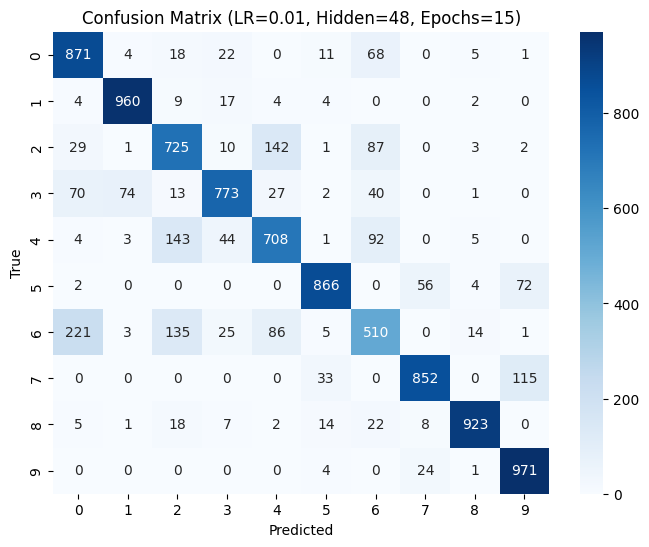

Epoch 1/5: 100%|██████████| 938/938 [00:15<00:00, 58.78it/s]


Epoch [1/5], Loss: 0.6650, Accuracy: 0.7610


Epoch 2/5: 100%|██████████| 938/938 [00:15<00:00, 59.92it/s]


Epoch [2/5], Loss: 0.6031, Accuracy: 0.7824


Epoch 3/5: 100%|██████████| 938/938 [00:15<00:00, 60.77it/s]


Epoch [3/5], Loss: 0.5909, Accuracy: 0.7880


Epoch 4/5: 100%|██████████| 938/938 [00:15<00:00, 60.39it/s]


Epoch [4/5], Loss: 0.5872, Accuracy: 0.7912


Epoch 5/5: 100%|██████████| 938/938 [00:14<00:00, 62.55it/s]


Epoch [5/5], Loss: 0.6033, Accuracy: 0.7863
Learning Rate: 0.01, Hidden Layer Size: 100, Number of Epochs: 5


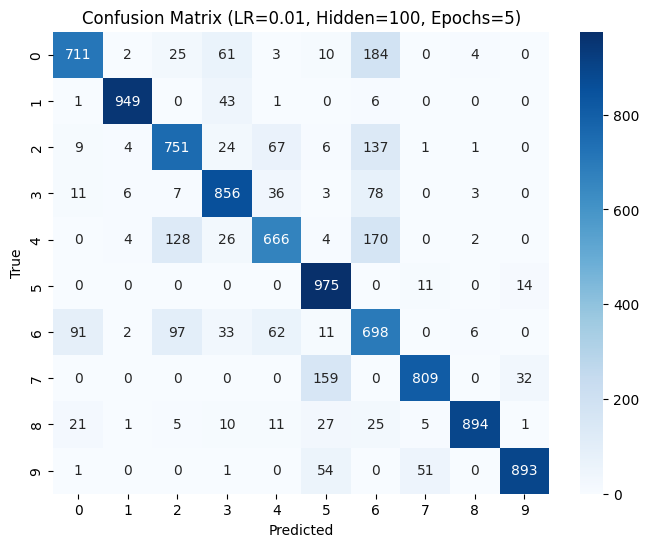

Epoch 1/10: 100%|██████████| 938/938 [00:14<00:00, 63.04it/s]


Epoch [1/10], Loss: 0.6579, Accuracy: 0.7659


Epoch 2/10: 100%|██████████| 938/938 [00:14<00:00, 63.32it/s]


Epoch [2/10], Loss: 0.6091, Accuracy: 0.7809


Epoch 3/10: 100%|██████████| 938/938 [00:14<00:00, 63.12it/s]


Epoch [3/10], Loss: 0.5865, Accuracy: 0.7903


Epoch 4/10: 100%|██████████| 938/938 [00:14<00:00, 63.21it/s]


Epoch [4/10], Loss: 0.5850, Accuracy: 0.7905


Epoch 5/10: 100%|██████████| 938/938 [00:15<00:00, 61.79it/s]


Epoch [5/10], Loss: 0.5863, Accuracy: 0.7927


Epoch 6/10: 100%|██████████| 938/938 [00:15<00:00, 60.84it/s]


Epoch [6/10], Loss: 0.5895, Accuracy: 0.7881


Epoch 7/10: 100%|██████████| 938/938 [00:15<00:00, 60.42it/s]


Epoch [7/10], Loss: 0.5781, Accuracy: 0.7948


Epoch 8/10: 100%|██████████| 938/938 [00:15<00:00, 61.70it/s]


Epoch [8/10], Loss: 0.5991, Accuracy: 0.7867


Epoch 9/10: 100%|██████████| 938/938 [00:14<00:00, 62.79it/s]


Epoch [9/10], Loss: 0.5854, Accuracy: 0.7915


Epoch 10/10: 100%|██████████| 938/938 [00:14<00:00, 63.10it/s]


Epoch [10/10], Loss: 0.5735, Accuracy: 0.7962
Learning Rate: 0.01, Hidden Layer Size: 100, Number of Epochs: 10


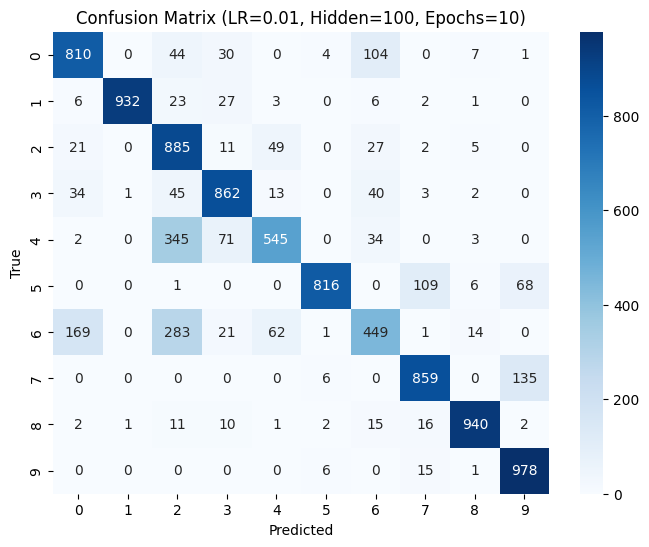

Epoch 1/15: 100%|██████████| 938/938 [00:14<00:00, 63.13it/s]


Epoch [1/15], Loss: 0.6529, Accuracy: 0.7669


Epoch 2/15: 100%|██████████| 938/938 [00:14<00:00, 63.81it/s]


Epoch [2/15], Loss: 0.5883, Accuracy: 0.7904


Epoch 3/15: 100%|██████████| 938/938 [00:14<00:00, 63.77it/s]


Epoch [3/15], Loss: 0.5850, Accuracy: 0.7915


Epoch 4/15: 100%|██████████| 938/938 [00:14<00:00, 63.74it/s]


Epoch [4/15], Loss: 0.6075, Accuracy: 0.7803


Epoch 5/15: 100%|██████████| 938/938 [00:14<00:00, 63.56it/s]


Epoch [5/15], Loss: 0.5893, Accuracy: 0.7884


Epoch 6/15: 100%|██████████| 938/938 [00:14<00:00, 63.26it/s]


Epoch [6/15], Loss: 0.5806, Accuracy: 0.7925


Epoch 7/15: 100%|██████████| 938/938 [00:14<00:00, 63.20it/s]


Epoch [7/15], Loss: 0.5833, Accuracy: 0.7907


Epoch 8/15: 100%|██████████| 938/938 [00:14<00:00, 63.43it/s]


Epoch [8/15], Loss: 0.5893, Accuracy: 0.7912


Epoch 9/15: 100%|██████████| 938/938 [00:14<00:00, 63.59it/s]


Epoch [9/15], Loss: 0.5881, Accuracy: 0.7897


Epoch 10/15: 100%|██████████| 938/938 [00:14<00:00, 63.28it/s]


Epoch [10/15], Loss: 0.5834, Accuracy: 0.7908


Epoch 11/15: 100%|██████████| 938/938 [00:14<00:00, 63.53it/s]


Epoch [11/15], Loss: 0.5707, Accuracy: 0.7946


Epoch 12/15: 100%|██████████| 938/938 [00:14<00:00, 63.22it/s]


Epoch [12/15], Loss: 0.5791, Accuracy: 0.7933


Epoch 13/15: 100%|██████████| 938/938 [00:14<00:00, 63.43it/s]


Epoch [13/15], Loss: 0.5874, Accuracy: 0.7910


Epoch 14/15: 100%|██████████| 938/938 [00:14<00:00, 63.57it/s]


Epoch [14/15], Loss: 0.5630, Accuracy: 0.7947


Epoch 15/15: 100%|██████████| 938/938 [00:14<00:00, 63.45it/s]


Epoch [15/15], Loss: 0.5810, Accuracy: 0.7953
Learning Rate: 0.01, Hidden Layer Size: 100, Number of Epochs: 15


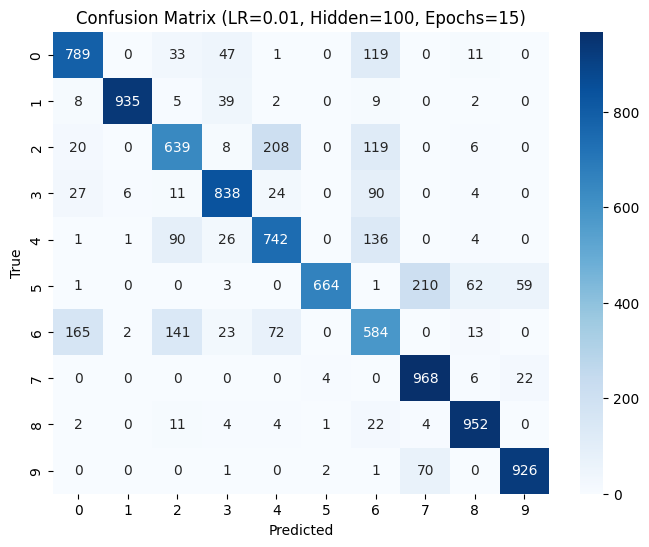

Epoch 1/5: 100%|██████████| 938/938 [00:14<00:00, 65.38it/s]


Epoch [1/5], Loss: 0.7486, Accuracy: 0.7292


Epoch 2/5: 100%|██████████| 938/938 [00:14<00:00, 66.64it/s]


Epoch [2/5], Loss: 0.5775, Accuracy: 0.7897


Epoch 3/5: 100%|██████████| 938/938 [00:14<00:00, 66.74it/s]


Epoch [3/5], Loss: 0.5445, Accuracy: 0.8038


Epoch 4/5: 100%|██████████| 938/938 [00:14<00:00, 66.34it/s]


Epoch [4/5], Loss: 0.5257, Accuracy: 0.8095


Epoch 5/5: 100%|██████████| 938/938 [00:14<00:00, 66.56it/s]


Epoch [5/5], Loss: 0.5132, Accuracy: 0.8137
Learning Rate: 0.001, Hidden Layer Size: 16, Number of Epochs: 5


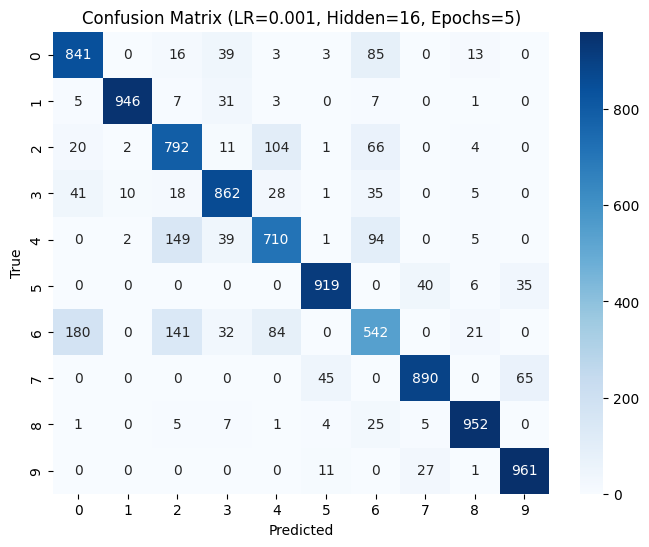

Epoch 1/10: 100%|██████████| 938/938 [00:14<00:00, 66.67it/s]


Epoch [1/10], Loss: 0.7750, Accuracy: 0.7179


Epoch 2/10: 100%|██████████| 938/938 [00:14<00:00, 65.35it/s]


Epoch [2/10], Loss: 0.5786, Accuracy: 0.7926


Epoch 3/10: 100%|██████████| 938/938 [00:14<00:00, 63.24it/s]


Epoch [3/10], Loss: 0.5430, Accuracy: 0.8041


Epoch 4/10: 100%|██████████| 938/938 [00:14<00:00, 66.22it/s]


Epoch [4/10], Loss: 0.5222, Accuracy: 0.8123


Epoch 5/10: 100%|██████████| 938/938 [00:14<00:00, 66.47it/s]


Epoch [5/10], Loss: 0.5108, Accuracy: 0.8152


Epoch 6/10: 100%|██████████| 938/938 [00:14<00:00, 66.15it/s]


Epoch [6/10], Loss: 0.5008, Accuracy: 0.8185


Epoch 7/10: 100%|██████████| 938/938 [00:14<00:00, 66.24it/s]


Epoch [7/10], Loss: 0.4956, Accuracy: 0.8202


Epoch 8/10: 100%|██████████| 938/938 [00:14<00:00, 66.49it/s]


Epoch [8/10], Loss: 0.4876, Accuracy: 0.8227


Epoch 9/10: 100%|██████████| 938/938 [00:14<00:00, 66.37it/s]


Epoch [9/10], Loss: 0.4869, Accuracy: 0.8243


Epoch 10/10: 100%|██████████| 938/938 [00:14<00:00, 66.54it/s]


Epoch [10/10], Loss: 0.4788, Accuracy: 0.8273
Learning Rate: 0.001, Hidden Layer Size: 16, Number of Epochs: 10


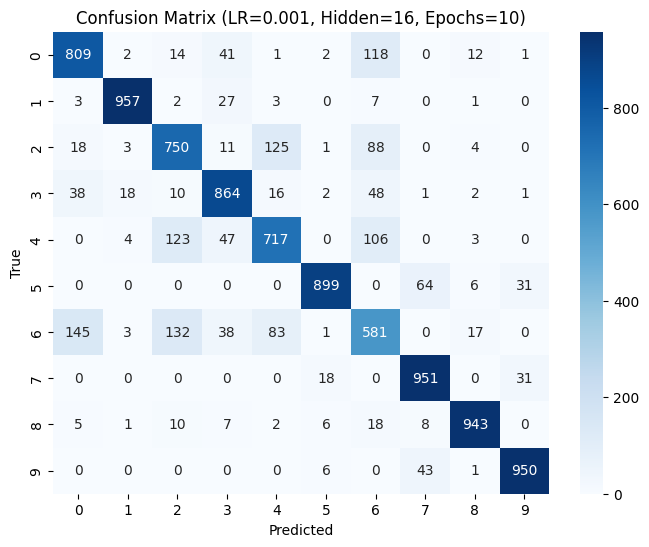

Epoch 1/15: 100%|██████████| 938/938 [00:14<00:00, 66.64it/s]


Epoch [1/15], Loss: 0.7606, Accuracy: 0.7330


Epoch 2/15: 100%|██████████| 938/938 [00:14<00:00, 66.57it/s]


Epoch [2/15], Loss: 0.5811, Accuracy: 0.7955


Epoch 3/15: 100%|██████████| 938/938 [00:14<00:00, 66.21it/s]


Epoch [3/15], Loss: 0.5452, Accuracy: 0.8053


Epoch 4/15: 100%|██████████| 938/938 [00:14<00:00, 66.14it/s]


Epoch [4/15], Loss: 0.5257, Accuracy: 0.8117


Epoch 5/15: 100%|██████████| 938/938 [00:14<00:00, 66.59it/s]


Epoch [5/15], Loss: 0.5117, Accuracy: 0.8146


Epoch 6/15: 100%|██████████| 938/938 [00:14<00:00, 66.34it/s]


Epoch [6/15], Loss: 0.5019, Accuracy: 0.8183


Epoch 7/15: 100%|██████████| 938/938 [00:14<00:00, 66.35it/s]


Epoch [7/15], Loss: 0.4952, Accuracy: 0.8222


Epoch 8/15: 100%|██████████| 938/938 [00:14<00:00, 66.45it/s]


Epoch [8/15], Loss: 0.4880, Accuracy: 0.8239


Epoch 9/15: 100%|██████████| 938/938 [00:14<00:00, 66.67it/s]


Epoch [9/15], Loss: 0.4831, Accuracy: 0.8245


Epoch 10/15: 100%|██████████| 938/938 [00:14<00:00, 63.08it/s]


Epoch [10/15], Loss: 0.4778, Accuracy: 0.8276


Epoch 11/15: 100%|██████████| 938/938 [00:14<00:00, 64.12it/s]


Epoch [11/15], Loss: 0.4727, Accuracy: 0.8274


Epoch 12/15: 100%|██████████| 938/938 [00:14<00:00, 65.97it/s]


Epoch [12/15], Loss: 0.4709, Accuracy: 0.8274


Epoch 13/15: 100%|██████████| 938/938 [00:14<00:00, 64.58it/s]


Epoch [13/15], Loss: 0.4646, Accuracy: 0.8308


Epoch 14/15: 100%|██████████| 938/938 [00:15<00:00, 61.64it/s]


Epoch [14/15], Loss: 0.4630, Accuracy: 0.8331


Epoch 15/15: 100%|██████████| 938/938 [00:14<00:00, 65.71it/s]


Epoch [15/15], Loss: 0.4595, Accuracy: 0.8319
Learning Rate: 0.001, Hidden Layer Size: 16, Number of Epochs: 15


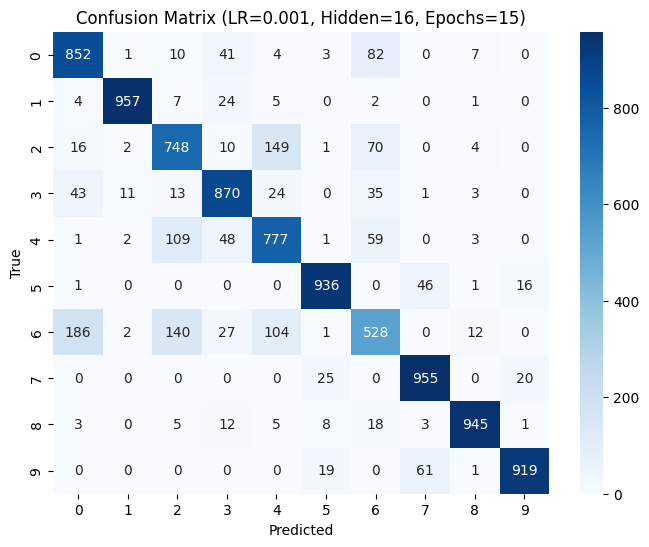

Epoch 1/5: 100%|██████████| 938/938 [00:14<00:00, 64.46it/s]


Epoch [1/5], Loss: 0.5957, Accuracy: 0.7883


Epoch 2/5: 100%|██████████| 938/938 [00:15<00:00, 61.87it/s]


Epoch [2/5], Loss: 0.4521, Accuracy: 0.8381


Epoch 3/5: 100%|██████████| 938/938 [00:15<00:00, 62.02it/s]


Epoch [3/5], Loss: 0.4184, Accuracy: 0.8506


Epoch 4/5: 100%|██████████| 938/938 [00:15<00:00, 60.79it/s]


Epoch [4/5], Loss: 0.3997, Accuracy: 0.8555


Epoch 5/5: 100%|██████████| 938/938 [00:14<00:00, 63.93it/s]


Epoch [5/5], Loss: 0.3838, Accuracy: 0.8617
Learning Rate: 0.001, Hidden Layer Size: 48, Number of Epochs: 5


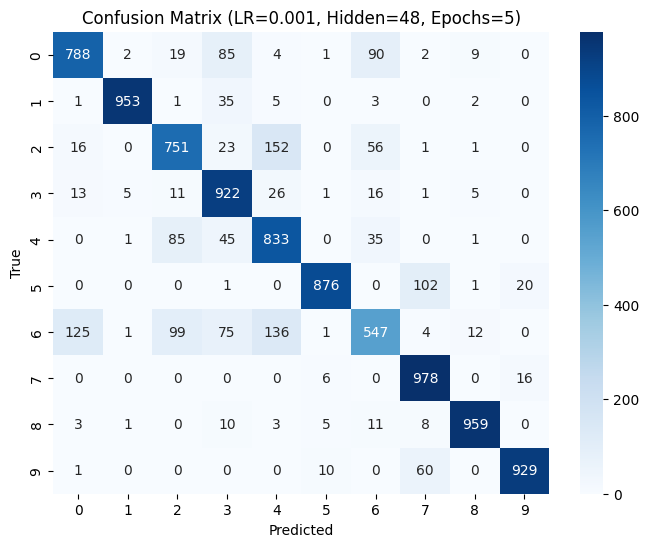

Epoch 1/10: 100%|██████████| 938/938 [00:14<00:00, 64.99it/s]


Epoch [1/10], Loss: 0.5866, Accuracy: 0.7922


Epoch 2/10: 100%|██████████| 938/938 [00:14<00:00, 65.29it/s]


Epoch [2/10], Loss: 0.4476, Accuracy: 0.8389


Epoch 3/10: 100%|██████████| 938/938 [00:15<00:00, 62.42it/s]


Epoch [3/10], Loss: 0.4132, Accuracy: 0.8499


Epoch 4/10: 100%|██████████| 938/938 [00:15<00:00, 61.14it/s]


Epoch [4/10], Loss: 0.3911, Accuracy: 0.8578


Epoch 5/10: 100%|██████████| 938/938 [00:14<00:00, 62.74it/s]


Epoch [5/10], Loss: 0.3803, Accuracy: 0.8633


Epoch 6/10: 100%|██████████| 938/938 [00:14<00:00, 63.06it/s]


Epoch [6/10], Loss: 0.3716, Accuracy: 0.8653


Epoch 7/10: 100%|██████████| 938/938 [00:14<00:00, 63.83it/s]


Epoch [7/10], Loss: 0.3623, Accuracy: 0.8681


Epoch 8/10: 100%|██████████| 938/938 [00:14<00:00, 63.14it/s]


Epoch [8/10], Loss: 0.3544, Accuracy: 0.8703


Epoch 9/10: 100%|██████████| 938/938 [00:14<00:00, 63.43it/s]


Epoch [9/10], Loss: 0.3483, Accuracy: 0.8721


Epoch 10/10: 100%|██████████| 938/938 [00:14<00:00, 64.38it/s]


Epoch [10/10], Loss: 0.3414, Accuracy: 0.8730
Learning Rate: 0.001, Hidden Layer Size: 48, Number of Epochs: 10


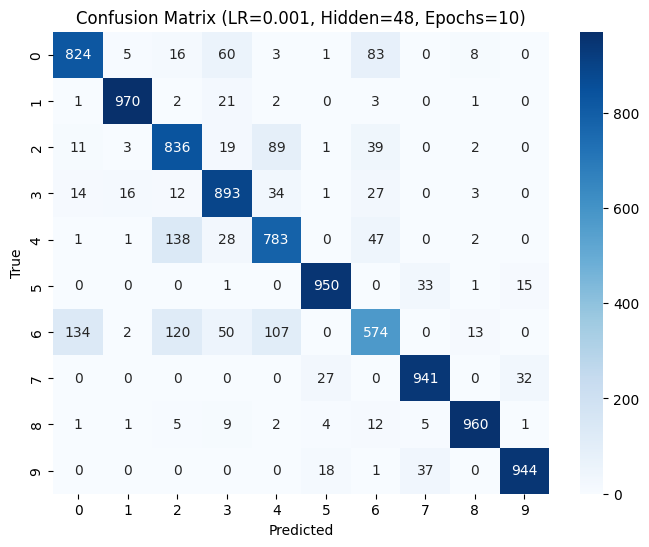

Epoch 1/15: 100%|██████████| 938/938 [00:14<00:00, 63.50it/s]


Epoch [1/15], Loss: 0.5921, Accuracy: 0.7886


Epoch 2/15: 100%|██████████| 938/938 [00:14<00:00, 64.14it/s]


Epoch [2/15], Loss: 0.4483, Accuracy: 0.8393


Epoch 3/15: 100%|██████████| 938/938 [00:14<00:00, 64.24it/s]


Epoch [3/15], Loss: 0.4146, Accuracy: 0.8497


Epoch 4/15: 100%|██████████| 938/938 [00:14<00:00, 64.19it/s]


Epoch [4/15], Loss: 0.3955, Accuracy: 0.8554


Epoch 5/15: 100%|██████████| 938/938 [00:14<00:00, 63.90it/s]


Epoch [5/15], Loss: 0.3829, Accuracy: 0.8612


Epoch 6/15: 100%|██████████| 938/938 [00:14<00:00, 63.05it/s]


Epoch [6/15], Loss: 0.3693, Accuracy: 0.8658


Epoch 7/15: 100%|██████████| 938/938 [00:14<00:00, 62.73it/s]


Epoch [7/15], Loss: 0.3662, Accuracy: 0.8660


Epoch 8/15: 100%|██████████| 938/938 [00:14<00:00, 63.97it/s]


Epoch [8/15], Loss: 0.3540, Accuracy: 0.8706


Epoch 9/15: 100%|██████████| 938/938 [00:14<00:00, 63.48it/s]


Epoch [9/15], Loss: 0.3505, Accuracy: 0.8709


Epoch 10/15: 100%|██████████| 938/938 [00:15<00:00, 58.75it/s]


Epoch [10/15], Loss: 0.3462, Accuracy: 0.8733


Epoch 11/15: 100%|██████████| 938/938 [00:14<00:00, 64.00it/s]


Epoch [11/15], Loss: 0.3419, Accuracy: 0.8750


Epoch 12/15: 100%|██████████| 938/938 [00:14<00:00, 64.84it/s]


Epoch [12/15], Loss: 0.3391, Accuracy: 0.8761


Epoch 13/15: 100%|██████████| 938/938 [00:14<00:00, 64.81it/s]


Epoch [13/15], Loss: 0.3353, Accuracy: 0.8777


Epoch 14/15: 100%|██████████| 938/938 [00:14<00:00, 62.62it/s]


Epoch [14/15], Loss: 0.3328, Accuracy: 0.8766


Epoch 15/15: 100%|██████████| 938/938 [00:15<00:00, 62.01it/s]


Epoch [15/15], Loss: 0.3267, Accuracy: 0.8796
Learning Rate: 0.001, Hidden Layer Size: 48, Number of Epochs: 15


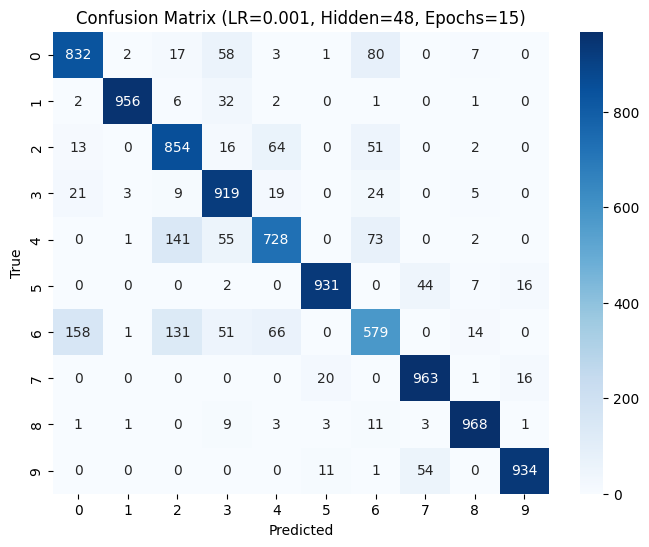

Epoch 1/5: 100%|██████████| 938/938 [00:14<00:00, 62.75it/s]


Epoch [1/5], Loss: 0.5430, Accuracy: 0.8048


Epoch 2/5: 100%|██████████| 938/938 [00:14<00:00, 63.17it/s]


Epoch [2/5], Loss: 0.4147, Accuracy: 0.8489


Epoch 3/5: 100%|██████████| 938/938 [00:14<00:00, 63.29it/s]


Epoch [3/5], Loss: 0.3804, Accuracy: 0.8621


Epoch 4/5: 100%|██████████| 938/938 [00:14<00:00, 63.28it/s]


Epoch [4/5], Loss: 0.3623, Accuracy: 0.8676


Epoch 5/5: 100%|██████████| 938/938 [00:15<00:00, 60.61it/s]


Epoch [5/5], Loss: 0.3466, Accuracy: 0.8731
Learning Rate: 0.001, Hidden Layer Size: 100, Number of Epochs: 5


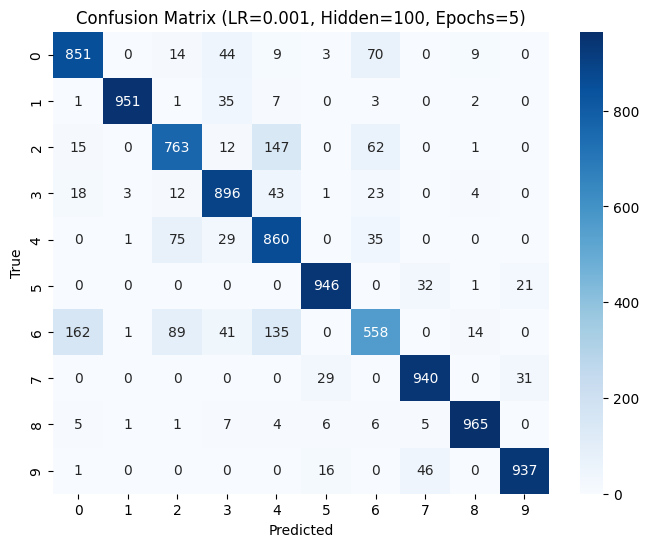

Epoch 1/10: 100%|██████████| 938/938 [00:15<00:00, 61.85it/s]


Epoch [1/10], Loss: 0.5439, Accuracy: 0.8062


Epoch 2/10: 100%|██████████| 938/938 [00:15<00:00, 60.41it/s]


Epoch [2/10], Loss: 0.4178, Accuracy: 0.8492


Epoch 3/10: 100%|██████████| 938/938 [00:15<00:00, 61.64it/s]


Epoch [3/10], Loss: 0.3859, Accuracy: 0.8599


Epoch 4/10: 100%|██████████| 938/938 [00:15<00:00, 61.70it/s]


Epoch [4/10], Loss: 0.3674, Accuracy: 0.8662


Epoch 5/10: 100%|██████████| 938/938 [00:15<00:00, 61.88it/s]


Epoch [5/10], Loss: 0.3548, Accuracy: 0.8695


Epoch 6/10: 100%|██████████| 938/938 [00:15<00:00, 60.42it/s]


Epoch [6/10], Loss: 0.3420, Accuracy: 0.8744


Epoch 7/10: 100%|██████████| 938/938 [00:15<00:00, 59.58it/s]


Epoch [7/10], Loss: 0.3336, Accuracy: 0.8780


Epoch 8/10: 100%|██████████| 938/938 [00:15<00:00, 61.33it/s]


Epoch [8/10], Loss: 0.3263, Accuracy: 0.8808


Epoch 9/10: 100%|██████████| 938/938 [00:15<00:00, 61.96it/s]


Epoch [9/10], Loss: 0.3184, Accuracy: 0.8829


Epoch 10/10: 100%|██████████| 938/938 [00:14<00:00, 62.80it/s]


Epoch [10/10], Loss: 0.3138, Accuracy: 0.8852
Learning Rate: 0.001, Hidden Layer Size: 100, Number of Epochs: 10


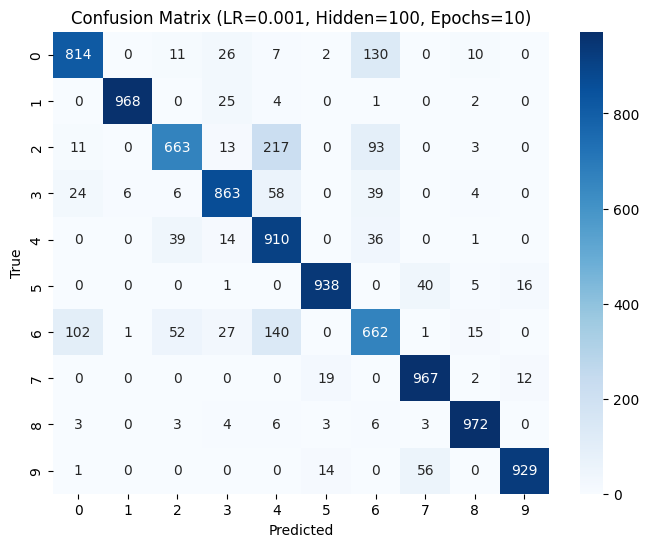

Epoch 1/15: 100%|██████████| 938/938 [00:14<00:00, 63.50it/s]


Epoch [1/15], Loss: 0.5446, Accuracy: 0.8036


Epoch 2/15: 100%|██████████| 938/938 [00:14<00:00, 63.38it/s]


Epoch [2/15], Loss: 0.4194, Accuracy: 0.8459


Epoch 3/15: 100%|██████████| 938/938 [00:14<00:00, 63.23it/s]


Epoch [3/15], Loss: 0.3860, Accuracy: 0.8595


Epoch 4/15: 100%|██████████| 938/938 [00:14<00:00, 63.31it/s]


Epoch [4/15], Loss: 0.3673, Accuracy: 0.8668


Epoch 5/15: 100%|██████████| 938/938 [00:15<00:00, 62.49it/s]


Epoch [5/15], Loss: 0.3531, Accuracy: 0.8700


Epoch 6/15: 100%|██████████| 938/938 [00:14<00:00, 63.32it/s]


Epoch [6/15], Loss: 0.3412, Accuracy: 0.8752


Epoch 7/15: 100%|██████████| 938/938 [00:14<00:00, 62.96it/s]


Epoch [7/15], Loss: 0.3283, Accuracy: 0.8797


Epoch 8/15: 100%|██████████| 938/938 [00:14<00:00, 63.43it/s]


Epoch [8/15], Loss: 0.3220, Accuracy: 0.8818


Epoch 9/15: 100%|██████████| 938/938 [00:14<00:00, 63.71it/s]


Epoch [9/15], Loss: 0.3183, Accuracy: 0.8831


Epoch 10/15: 100%|██████████| 938/938 [00:14<00:00, 63.66it/s]


Epoch [10/15], Loss: 0.3083, Accuracy: 0.8864


Epoch 11/15: 100%|██████████| 938/938 [00:14<00:00, 63.21it/s]


Epoch [11/15], Loss: 0.3067, Accuracy: 0.8880


Epoch 12/15: 100%|██████████| 938/938 [00:15<00:00, 62.32it/s]


Epoch [12/15], Loss: 0.3008, Accuracy: 0.8894


Epoch 13/15: 100%|██████████| 938/938 [00:16<00:00, 55.25it/s]


Epoch [13/15], Loss: 0.2982, Accuracy: 0.8899


Epoch 14/15: 100%|██████████| 938/938 [00:15<00:00, 60.59it/s]


Epoch [14/15], Loss: 0.2909, Accuracy: 0.8918


Epoch 15/15: 100%|██████████| 938/938 [00:15<00:00, 60.87it/s]


Epoch [15/15], Loss: 0.2868, Accuracy: 0.8942
Learning Rate: 0.001, Hidden Layer Size: 100, Number of Epochs: 15


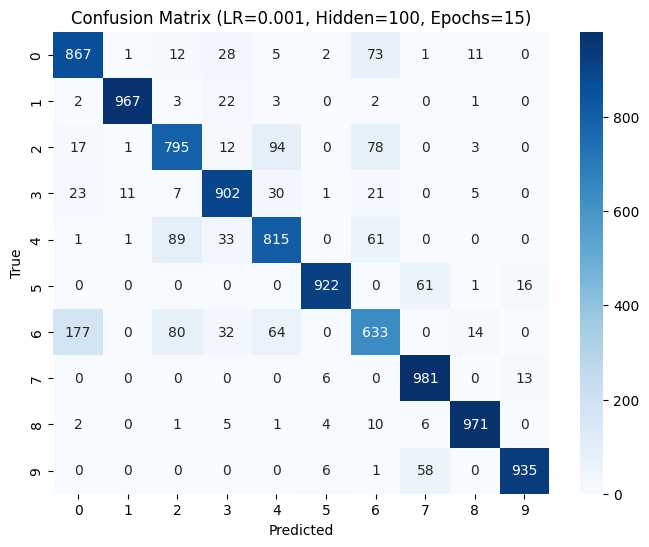

Epoch 1/5: 100%|██████████| 938/938 [00:14<00:00, 64.95it/s]


Epoch [1/5], Loss: 1.2942, Accuracy: 0.5746


Epoch 2/5: 100%|██████████| 938/938 [00:14<00:00, 65.26it/s]


Epoch [2/5], Loss: 0.8487, Accuracy: 0.7051


Epoch 3/5: 100%|██████████| 938/938 [00:14<00:00, 64.94it/s]


Epoch [3/5], Loss: 0.7514, Accuracy: 0.7322


Epoch 4/5: 100%|██████████| 938/938 [00:14<00:00, 65.35it/s]


Epoch [4/5], Loss: 0.6969, Accuracy: 0.7513


Epoch 5/5: 100%|██████████| 938/938 [00:14<00:00, 63.67it/s]


Epoch [5/5], Loss: 0.6569, Accuracy: 0.7670
Learning Rate: 0.0001, Hidden Layer Size: 16, Number of Epochs: 5


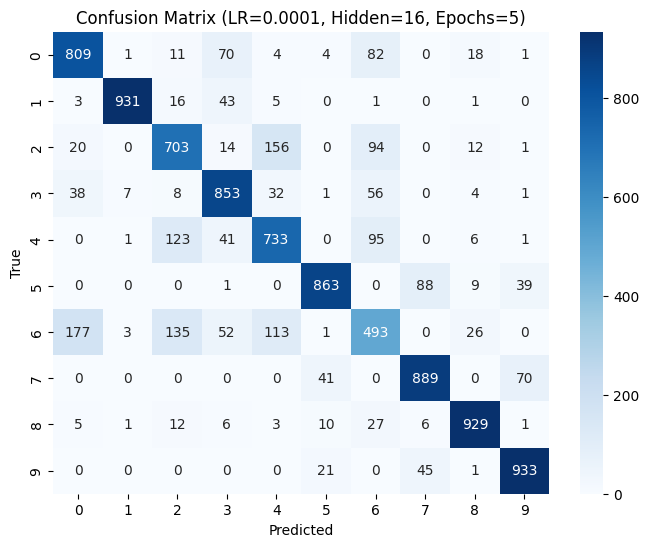

Epoch 1/10: 100%|██████████| 938/938 [00:14<00:00, 63.70it/s]


Epoch [1/10], Loss: 1.2034, Accuracy: 0.6044


Epoch 2/10: 100%|██████████| 938/938 [00:14<00:00, 64.12it/s]


Epoch [2/10], Loss: 0.8068, Accuracy: 0.7186


Epoch 3/10: 100%|██████████| 938/938 [00:14<00:00, 64.16it/s]


Epoch [3/10], Loss: 0.7125, Accuracy: 0.7487


Epoch 4/10: 100%|██████████| 938/938 [00:14<00:00, 63.52it/s]


Epoch [4/10], Loss: 0.6639, Accuracy: 0.7652


Epoch 5/10: 100%|██████████| 938/938 [00:14<00:00, 66.17it/s]


Epoch [5/10], Loss: 0.6322, Accuracy: 0.7763


Epoch 6/10: 100%|██████████| 938/938 [00:14<00:00, 66.32it/s]


Epoch [6/10], Loss: 0.6107, Accuracy: 0.7859


Epoch 7/10: 100%|██████████| 938/938 [00:14<00:00, 66.26it/s]


Epoch [7/10], Loss: 0.5905, Accuracy: 0.7930


Epoch 8/10: 100%|██████████| 938/938 [00:14<00:00, 66.25it/s]


Epoch [8/10], Loss: 0.5790, Accuracy: 0.7969


Epoch 9/10: 100%|██████████| 938/938 [00:14<00:00, 66.25it/s]


Epoch [9/10], Loss: 0.5652, Accuracy: 0.7998


Epoch 10/10: 100%|██████████| 938/938 [00:14<00:00, 62.99it/s]


Epoch [10/10], Loss: 0.5561, Accuracy: 0.8040
Learning Rate: 0.0001, Hidden Layer Size: 16, Number of Epochs: 10


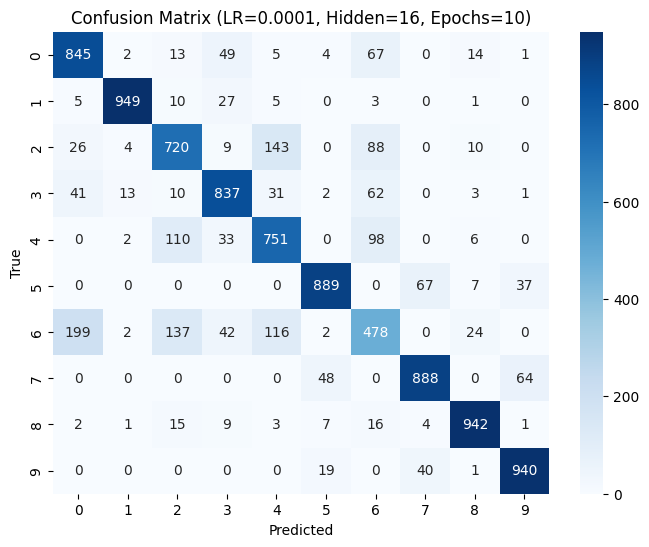

Epoch 1/15: 100%|██████████| 938/938 [00:14<00:00, 64.89it/s]


Epoch [1/15], Loss: 1.2632, Accuracy: 0.5872


Epoch 2/15: 100%|██████████| 938/938 [00:14<00:00, 63.95it/s]


Epoch [2/15], Loss: 0.8257, Accuracy: 0.7204


Epoch 3/15: 100%|██████████| 938/938 [00:14<00:00, 65.50it/s]


Epoch [3/15], Loss: 0.7185, Accuracy: 0.7524


Epoch 4/15: 100%|██████████| 938/938 [00:14<00:00, 63.64it/s]


Epoch [4/15], Loss: 0.6674, Accuracy: 0.7675


Epoch 5/15: 100%|██████████| 938/938 [00:14<00:00, 64.81it/s]


Epoch [5/15], Loss: 0.6370, Accuracy: 0.7770


Epoch 6/15: 100%|██████████| 938/938 [00:14<00:00, 64.89it/s]


Epoch [6/15], Loss: 0.6109, Accuracy: 0.7864


Epoch 7/15: 100%|██████████| 938/938 [00:14<00:00, 65.10it/s]


Epoch [7/15], Loss: 0.5975, Accuracy: 0.7901


Epoch 8/15: 100%|██████████| 938/938 [00:14<00:00, 64.42it/s]


Epoch [8/15], Loss: 0.5785, Accuracy: 0.7964


Epoch 9/15: 100%|██████████| 938/938 [00:15<00:00, 62.43it/s]


Epoch [9/15], Loss: 0.5668, Accuracy: 0.7996


Epoch 10/15: 100%|██████████| 938/938 [00:14<00:00, 63.97it/s]


Epoch [10/15], Loss: 0.5594, Accuracy: 0.8008


Epoch 11/15: 100%|██████████| 938/938 [00:14<00:00, 63.78it/s]


Epoch [11/15], Loss: 0.5509, Accuracy: 0.8057


Epoch 12/15: 100%|██████████| 938/938 [00:15<00:00, 61.96it/s]


Epoch [12/15], Loss: 0.5447, Accuracy: 0.8061


Epoch 13/15: 100%|██████████| 938/938 [00:14<00:00, 63.20it/s]


Epoch [13/15], Loss: 0.5358, Accuracy: 0.8093


Epoch 14/15: 100%|██████████| 938/938 [00:14<00:00, 66.26it/s]


Epoch [14/15], Loss: 0.5299, Accuracy: 0.8125


Epoch 15/15: 100%|██████████| 938/938 [00:14<00:00, 62.94it/s]


Epoch [15/15], Loss: 0.5254, Accuracy: 0.8135
Learning Rate: 0.0001, Hidden Layer Size: 16, Number of Epochs: 15


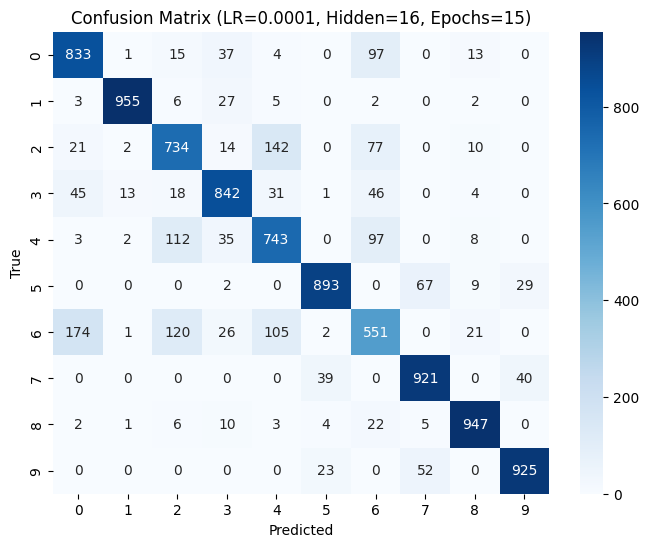

Epoch 1/5: 100%|██████████| 938/938 [00:14<00:00, 64.79it/s]


Epoch [1/5], Loss: 0.9447, Accuracy: 0.6893


Epoch 2/5: 100%|██████████| 938/938 [00:14<00:00, 64.42it/s]


Epoch [2/5], Loss: 0.6058, Accuracy: 0.7848


Epoch 3/5: 100%|██████████| 938/938 [00:14<00:00, 64.77it/s]


Epoch [3/5], Loss: 0.5407, Accuracy: 0.8097


Epoch 4/5: 100%|██████████| 938/938 [00:14<00:00, 65.21it/s]


Epoch [4/5], Loss: 0.5041, Accuracy: 0.8216


Epoch 5/5: 100%|██████████| 938/938 [00:14<00:00, 65.56it/s]


Epoch [5/5], Loss: 0.4812, Accuracy: 0.8301
Learning Rate: 0.0001, Hidden Layer Size: 48, Number of Epochs: 5


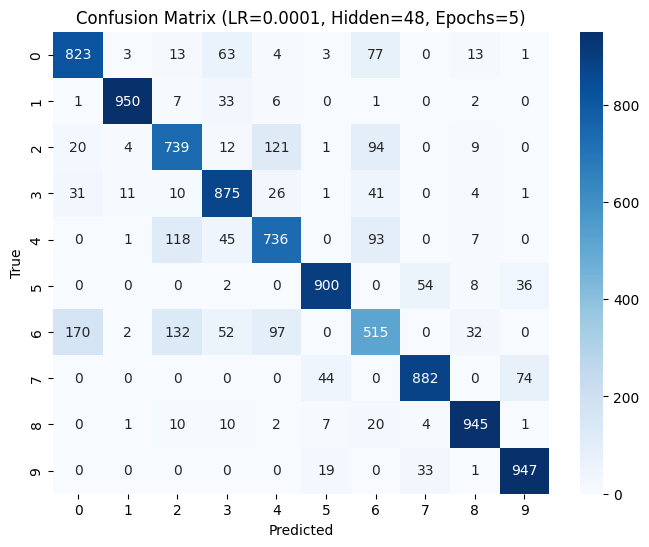

Epoch 1/10: 100%|██████████| 938/938 [00:14<00:00, 63.03it/s]


Epoch [1/10], Loss: 0.9555, Accuracy: 0.6824


Epoch 2/10: 100%|██████████| 938/938 [00:14<00:00, 64.98it/s]


Epoch [2/10], Loss: 0.6112, Accuracy: 0.7855


Epoch 3/10: 100%|██████████| 938/938 [00:14<00:00, 65.26it/s]


Epoch [3/10], Loss: 0.5403, Accuracy: 0.8105


Epoch 4/10: 100%|██████████| 938/938 [00:14<00:00, 62.80it/s]


Epoch [4/10], Loss: 0.5065, Accuracy: 0.8204


Epoch 5/10: 100%|██████████| 938/938 [00:16<00:00, 58.09it/s]


Epoch [5/10], Loss: 0.4825, Accuracy: 0.8303


Epoch 6/10: 100%|██████████| 938/938 [00:15<00:00, 60.31it/s]


Epoch [6/10], Loss: 0.4634, Accuracy: 0.8362


Epoch 7/10: 100%|██████████| 938/938 [00:15<00:00, 62.39it/s]


Epoch [7/10], Loss: 0.4488, Accuracy: 0.8407


Epoch 8/10: 100%|██████████| 938/938 [00:14<00:00, 63.46it/s]


Epoch [8/10], Loss: 0.4379, Accuracy: 0.8448


Epoch 9/10: 100%|██████████| 938/938 [00:15<00:00, 62.39it/s]


Epoch [9/10], Loss: 0.4273, Accuracy: 0.8481


Epoch 10/10: 100%|██████████| 938/938 [00:15<00:00, 61.12it/s]


Epoch [10/10], Loss: 0.4186, Accuracy: 0.8529
Learning Rate: 0.0001, Hidden Layer Size: 48, Number of Epochs: 10


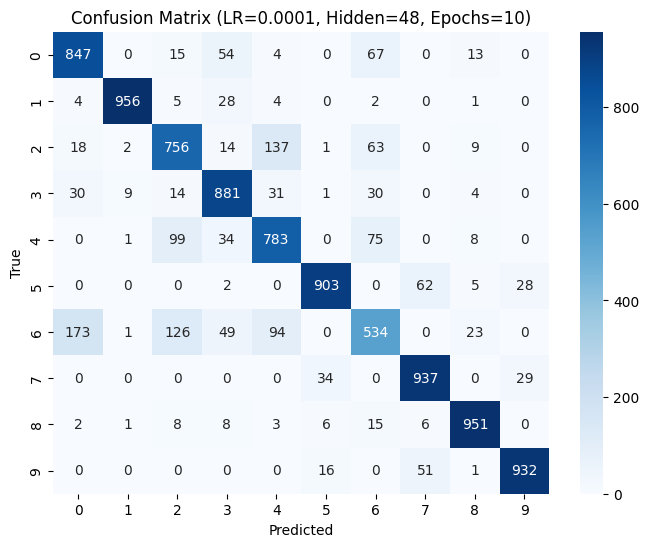

Epoch 1/15: 100%|██████████| 938/938 [00:14<00:00, 64.21it/s]


Epoch [1/15], Loss: 0.9370, Accuracy: 0.6930


Epoch 2/15: 100%|██████████| 938/938 [00:15<00:00, 61.86it/s]


Epoch [2/15], Loss: 0.6053, Accuracy: 0.7882


Epoch 3/15: 100%|██████████| 938/938 [00:14<00:00, 62.88it/s]


Epoch [3/15], Loss: 0.5377, Accuracy: 0.8104


Epoch 4/15: 100%|██████████| 938/938 [00:15<00:00, 62.10it/s]


Epoch [4/15], Loss: 0.5034, Accuracy: 0.8233


Epoch 5/15: 100%|██████████| 938/938 [00:15<00:00, 61.04it/s]


Epoch [5/15], Loss: 0.4806, Accuracy: 0.8298


Epoch 6/15: 100%|██████████| 938/938 [00:14<00:00, 64.42it/s]


Epoch [6/15], Loss: 0.4626, Accuracy: 0.8354


Epoch 7/15: 100%|██████████| 938/938 [00:14<00:00, 63.42it/s]


Epoch [7/15], Loss: 0.4472, Accuracy: 0.8419


Epoch 8/15: 100%|██████████| 938/938 [00:15<00:00, 62.39it/s]


Epoch [8/15], Loss: 0.4381, Accuracy: 0.8451


Epoch 9/15: 100%|██████████| 938/938 [00:14<00:00, 63.60it/s]


Epoch [9/15], Loss: 0.4273, Accuracy: 0.8483


Epoch 10/15: 100%|██████████| 938/938 [00:14<00:00, 64.47it/s]


Epoch [10/15], Loss: 0.4179, Accuracy: 0.8535


Epoch 11/15: 100%|██████████| 938/938 [00:14<00:00, 65.61it/s]


Epoch [11/15], Loss: 0.4114, Accuracy: 0.8542


Epoch 12/15: 100%|██████████| 938/938 [00:14<00:00, 65.52it/s]


Epoch [12/15], Loss: 0.4040, Accuracy: 0.8577


Epoch 13/15: 100%|██████████| 938/938 [00:14<00:00, 65.81it/s]


Epoch [13/15], Loss: 0.3975, Accuracy: 0.8597


Epoch 14/15: 100%|██████████| 938/938 [00:14<00:00, 65.70it/s]


Epoch [14/15], Loss: 0.3927, Accuracy: 0.8606


Epoch 15/15: 100%|██████████| 938/938 [00:14<00:00, 65.64it/s]


Epoch [15/15], Loss: 0.3884, Accuracy: 0.8619
Learning Rate: 0.0001, Hidden Layer Size: 48, Number of Epochs: 15


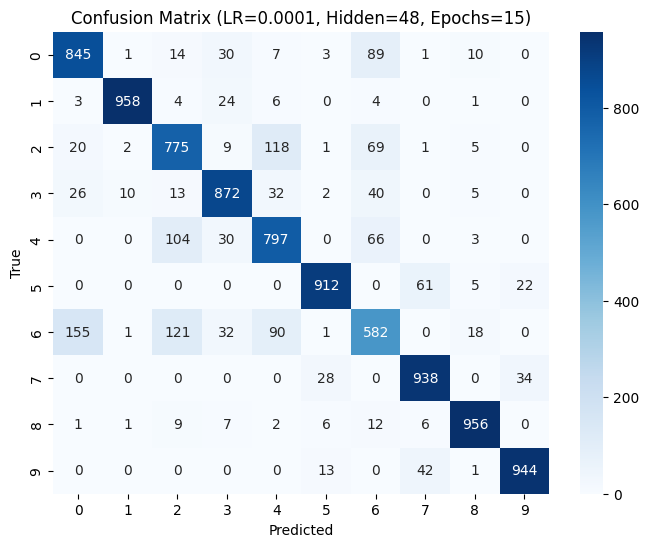

Epoch 1/5: 100%|██████████| 938/938 [00:15<00:00, 61.84it/s]


Epoch [1/5], Loss: 0.8172, Accuracy: 0.7345


Epoch 2/5: 100%|██████████| 938/938 [00:15<00:00, 61.94it/s]


Epoch [2/5], Loss: 0.5395, Accuracy: 0.8120


Epoch 3/5: 100%|██████████| 938/938 [00:15<00:00, 61.62it/s]


Epoch [3/5], Loss: 0.4866, Accuracy: 0.8279


Epoch 4/5: 100%|██████████| 938/938 [00:15<00:00, 61.95it/s]


Epoch [4/5], Loss: 0.4543, Accuracy: 0.8392


Epoch 5/5: 100%|██████████| 938/938 [00:15<00:00, 61.41it/s]


Epoch [5/5], Loss: 0.4334, Accuracy: 0.8451
Learning Rate: 0.0001, Hidden Layer Size: 100, Number of Epochs: 5


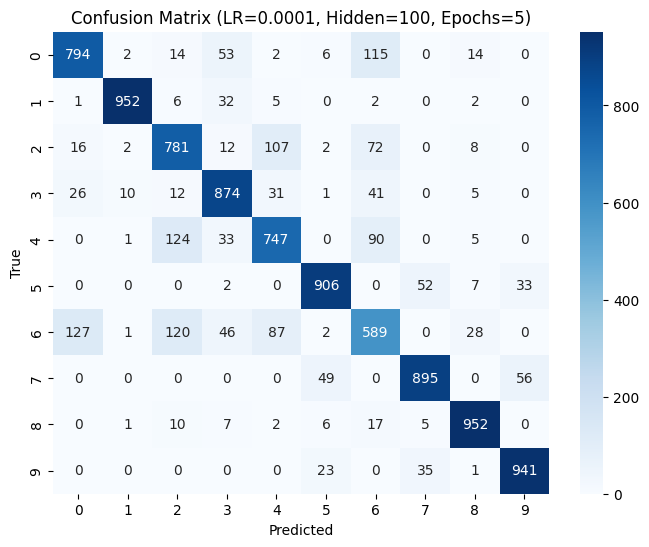

Epoch 1/10: 100%|██████████| 938/938 [00:15<00:00, 60.96it/s]


Epoch [1/10], Loss: 0.8235, Accuracy: 0.7274


Epoch 2/10: 100%|██████████| 938/938 [00:17<00:00, 53.87it/s]


Epoch [2/10], Loss: 0.5396, Accuracy: 0.8088


Epoch 3/10: 100%|██████████| 938/938 [00:15<00:00, 59.49it/s]


Epoch [3/10], Loss: 0.4857, Accuracy: 0.8275


Epoch 4/10: 100%|██████████| 938/938 [00:14<00:00, 63.22it/s]


Epoch [4/10], Loss: 0.4539, Accuracy: 0.8390


Epoch 5/10: 100%|██████████| 938/938 [00:14<00:00, 63.06it/s]


Epoch [5/10], Loss: 0.4333, Accuracy: 0.8473


Epoch 6/10: 100%|██████████| 938/938 [00:14<00:00, 62.82it/s]


Epoch [6/10], Loss: 0.4183, Accuracy: 0.8504


Epoch 7/10: 100%|██████████| 938/938 [00:14<00:00, 62.75it/s]


Epoch [7/10], Loss: 0.4029, Accuracy: 0.8562


Epoch 8/10: 100%|██████████| 938/938 [00:15<00:00, 61.76it/s]


Epoch [8/10], Loss: 0.3923, Accuracy: 0.8600


Epoch 9/10: 100%|██████████| 938/938 [00:16<00:00, 56.94it/s]


Epoch [9/10], Loss: 0.3839, Accuracy: 0.8637


Epoch 10/10: 100%|██████████| 938/938 [00:16<00:00, 57.94it/s]


Epoch [10/10], Loss: 0.3752, Accuracy: 0.8664
Learning Rate: 0.0001, Hidden Layer Size: 100, Number of Epochs: 10


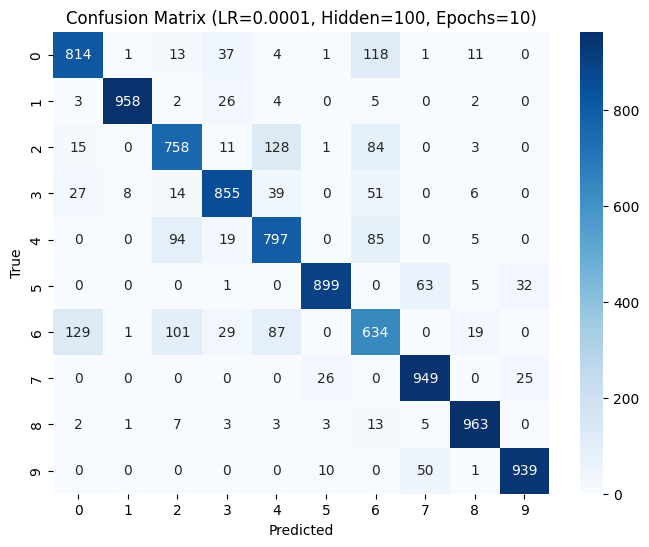

Epoch 1/15: 100%|██████████| 938/938 [00:15<00:00, 58.73it/s]


Epoch [1/15], Loss: 0.8128, Accuracy: 0.7283


Epoch 2/15: 100%|██████████| 938/938 [00:15<00:00, 59.11it/s]


Epoch [2/15], Loss: 0.5325, Accuracy: 0.8131


Epoch 3/15: 100%|██████████| 938/938 [00:16<00:00, 58.44it/s]


Epoch [3/15], Loss: 0.4817, Accuracy: 0.8285


Epoch 4/15: 100%|██████████| 938/938 [00:16<00:00, 57.83it/s]


Epoch [4/15], Loss: 0.4510, Accuracy: 0.8406


Epoch 5/15: 100%|██████████| 938/938 [00:16<00:00, 58.62it/s]


Epoch [5/15], Loss: 0.4292, Accuracy: 0.8486


Epoch 6/15: 100%|██████████| 938/938 [00:15<00:00, 58.65it/s]


Epoch [6/15], Loss: 0.4122, Accuracy: 0.8527


Epoch 7/15: 100%|██████████| 938/938 [00:16<00:00, 57.98it/s]


Epoch [7/15], Loss: 0.4001, Accuracy: 0.8580


Epoch 8/15: 100%|██████████| 938/938 [00:16<00:00, 58.13it/s]


Epoch [8/15], Loss: 0.3895, Accuracy: 0.8609


Epoch 9/15: 100%|██████████| 938/938 [00:15<00:00, 61.34it/s]


Epoch [9/15], Loss: 0.3804, Accuracy: 0.8637


Epoch 10/15: 100%|██████████| 938/938 [00:15<00:00, 59.24it/s]


Epoch [10/15], Loss: 0.3704, Accuracy: 0.8687


Epoch 11/15: 100%|██████████| 938/938 [00:15<00:00, 58.98it/s]


Epoch [11/15], Loss: 0.3632, Accuracy: 0.8700


Epoch 12/15: 100%|██████████| 938/938 [00:16<00:00, 55.74it/s]


Epoch [12/15], Loss: 0.3571, Accuracy: 0.8724


Epoch 13/15: 100%|██████████| 938/938 [00:17<00:00, 54.57it/s]


Epoch [13/15], Loss: 0.3506, Accuracy: 0.8752


Epoch 14/15: 100%|██████████| 938/938 [00:19<00:00, 49.15it/s]


Epoch [14/15], Loss: 0.3451, Accuracy: 0.8758


Epoch 15/15: 100%|██████████| 938/938 [00:17<00:00, 52.50it/s]


Epoch [15/15], Loss: 0.3400, Accuracy: 0.8786
Learning Rate: 0.0001, Hidden Layer Size: 100, Number of Epochs: 15


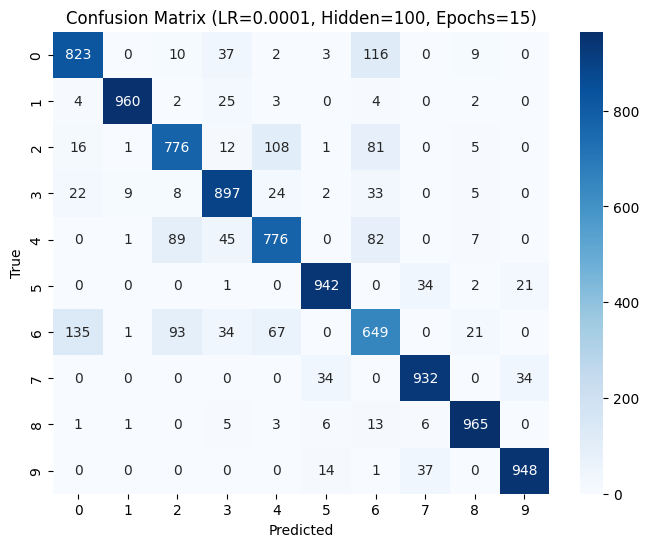

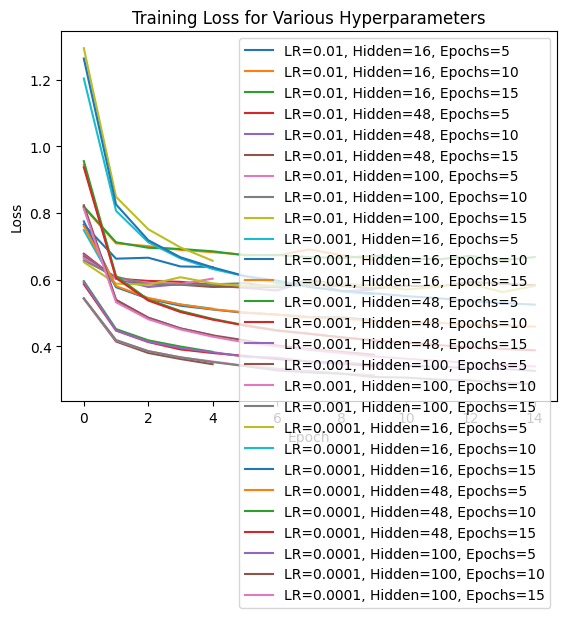

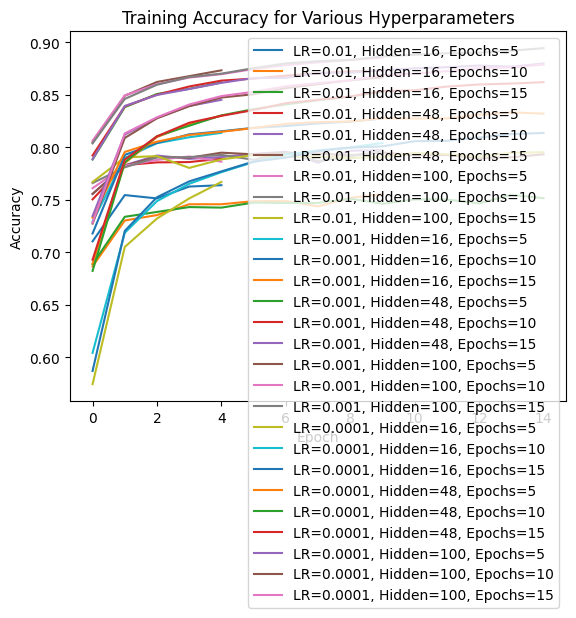

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the modified model class
class Modified_MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=None):
        super(Modified_MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_rate = dropout_rate

        self.fc1 = nn.Linear(self.input_size, self.hidden_size)
        self.fc2 = nn.Linear(self.hidden_size, self.output_size)

        if self.dropout_rate is not None:
            self.dropout = nn.Dropout(self.dropout_rate)
        else:
            self.dropout = None

    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = F.relu(self.fc1(x))
        if self.dropout is not None:
            x = self.dropout(x)
        x = self.fc2(x)
        return x

    def train_MLP(self, train_loader, num_epochs, learning_rate, optimizer=None, l2_lambda=None):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.to(device)

        criterion = nn.CrossEntropyLoss()
        if optimizer is None:
            optimizer = optim.SGD(self.parameters(), lr=learning_rate)

        train_losses, train_accuracies = [], []

        for epoch in range(num_epochs):
            self.train()
            epoch_loss = 0
            correct, total = 0, 0
            for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
                inputs, targets = inputs.to(device), targets.to(device)

                outputs = self.forward(inputs)
                loss = criterion(outputs, targets)

                if l2_lambda is not None:
                    l2_reg = sum(p.pow(2).sum() for p in self.parameters())
                    loss += l2_lambda * l2_reg

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()
                
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == targets).sum().item()
                total += targets.size(0)

            avg_epoch_loss = epoch_loss / len(train_loader)
            accuracy = correct / total
            train_losses.append(avg_epoch_loss)
            train_accuracies.append(accuracy)
            
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}, Accuracy: {accuracy:.4f}")

        return train_losses, train_accuracies

    def evaluate(self, test_loader):
        self.eval()
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.to(device)

        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = self(images)
                _, predicted = torch.max(outputs, 1)
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        return all_preds, all_labels


# Training and evaluation loop with confusion matrix
lrs = [0.01, 0.001, 0.0001]
hidden_sizes = [16, 48, 100]
number_of_epochs = [5, 10, 15]
all_train_losses = []
all_train_accuracies = []

for lr in lrs:
    for hidden_size in hidden_sizes:
        for num_epochs in number_of_epochs:
            model = Modified_MLP(input_size=784, hidden_size=hidden_size, output_size=10, dropout_rate=0.2)
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.0001)
            train_losses, train_accuracies = model.train_MLP(train_loader, num_epochs=num_epochs, learning_rate=lr, optimizer=optimizer)

            # Append losses and accuracies for plotting later
            all_train_losses.append((lr, hidden_size, num_epochs, train_losses))
            all_train_accuracies.append((lr, hidden_size, num_epochs, train_accuracies))
            
            print(f'Learning Rate: {lr}, Hidden Layer Size: {hidden_size}, Number of Epochs: {num_epochs}')

            # Evaluate on test data and generate confusion matrix
            preds, labels = model.evaluate(test_loader)
            conf_matrix = confusion_matrix(labels, preds)
            
            # Plot the confusion matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.title(f'Confusion Matrix (LR={lr}, Hidden={hidden_size}, Epochs={num_epochs})')
            plt.show()

# Plot the loss and accuracy for each combination of parameters
for (lr, hidden_size, num_epochs, losses) in all_train_losses:
    plt.plot(losses, label=f'LR={lr}, Hidden={hidden_size}, Epochs={num_epochs}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss for Various Hyperparameters')
plt.show()

for (lr, hidden_size, num_epochs, accuracies) in all_train_accuracies:
    plt.plot(accuracies, label=f'LR={lr}, Hidden={hidden_size}, Epochs={num_epochs}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy for Various Hyperparameters')
plt.show()

# 2_1

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


## 2_1_a

In [15]:
# Activation functions and derivatives
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Forward pass
def forward(X, W1, W2):
    z1 = X.dot(W1)
    Z = tanh(z1)
    y_pred = Z.dot(W2)
    return y_pred, Z
    

## 2_1_b

In [16]:
# Backward pass
def backward(X, y, M, iters=1000, learning_rate=0.01):
    input_size = X.shape[1]
    output_size = y.shape[1]

    # Initialize weights
    np.random.seed(0)
    W1 = np.random.randn(input_size, M) * 0.01
    W2 = np.random.randn(M, output_size) * 0.01

    error_over_time = []

    for i in range(iters):
        # Forward pass
        y_pred, Z = forward(X, W1, W2)
        
        # Calculate loss
        loss = np.sqrt(mean_squared_error(y, y_pred))
        error_over_time.append(loss)

        # Print loss every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, RMSE: {loss}")

        # Backpropagation
        output_error = y_pred - y
        dW2 = Z.T.dot(output_error) / X.shape[0]
        hidden_error = output_error.dot(W2.T) * tanh_derivative(Z)
        dW1 = X.T.dot(hidden_error) / X.shape[0]

        # Update weights
        W1 -= learning_rate * dW1
        W2 -= learning_rate * dW2

    return W1, W2, error_over_time
    

# 2_2

Iteration 0, RMSE: 5.6999889100343415
Iteration 100, RMSE: 0.8551095942183585
Iteration 200, RMSE: 0.6361198969697293
Iteration 300, RMSE: 0.6352586011225113
Iteration 400, RMSE: 0.6350076321256716
Iteration 500, RMSE: 0.6348632728801176
Iteration 600, RMSE: 0.63473082305804
Iteration 700, RMSE: 0.634586371619537
Iteration 800, RMSE: 0.6344213676526231
Iteration 900, RMSE: 0.6342309325118878


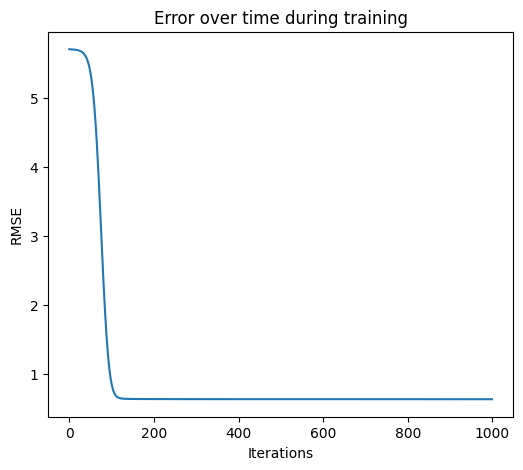

Training RMSE: 0.6340112192029363
Testing RMSE: 0.6657068131625345
Iteration 0, RMSE: 5.6999889100343415
Iteration 100, RMSE: 5.695881577605021
Iteration 200, RMSE: 5.6860116880977
Iteration 300, RMSE: 5.65655292046128
Iteration 400, RMSE: 5.568016369303851
Iteration 500, RMSE: 5.316263973889205
Iteration 600, RMSE: 4.699441239570078
Iteration 700, RMSE: 3.5815816185652247
Iteration 800, RMSE: 2.272889687157041
Iteration 900, RMSE: 1.304097267797259
Iteration 0, RMSE: 5.6999889100343415
Iteration 100, RMSE: 0.8551095942183585
Iteration 200, RMSE: 0.6361198969697293
Iteration 300, RMSE: 0.6352586011225113
Iteration 400, RMSE: 0.6350076321256716
Iteration 500, RMSE: 0.6348632728801176
Iteration 600, RMSE: 0.63473082305804
Iteration 700, RMSE: 0.634586371619537
Iteration 800, RMSE: 0.6344213676526231
Iteration 900, RMSE: 0.6342309325118878
Iteration 0, RMSE: 5.6999889100343415
Iteration 100, RMSE: 0.6340449333654562
Iteration 200, RMSE: 0.6299481567942191
Iteration 300, RMSE: 0.6239327359

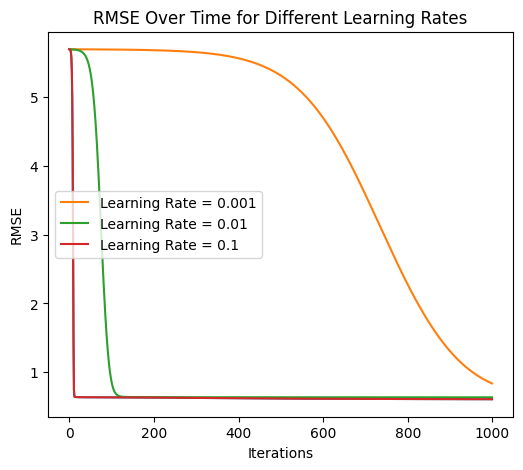

In [17]:
# Load and preprocess the data
data = pd.read_csv("Data/winequality-red.csv")
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values.reshape(-1, 1)  # Labels

# Standardize the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Add bias term
X = np.c_[X, np.ones(X.shape[0])]  # Adding bias as an extra column

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Model Training
M = 30  # Number of hidden neurons
iters = 1000
learning_rate = 0.01

W1, W2, error_over_time = backward(X_train, y_train, M, iters, learning_rate)

# Plot error over time to see convergence
plt.figure(figsize=(6, 5))
plt.plot(error_over_time)
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("Error over time during training")
plt.show()

# Testing
y_pred_train, _ = forward(X_train, W1, W2)
y_pred_test, _ = forward(X_test, W1, W2)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Results
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1]
results = {}

for lr in learning_rates:
    W1, W2, error_over_time = backward(X_train, y_train, M, iters, lr)
    y_pred_train, _ = forward(X_train, W1, W2)
    y_pred_test, _ = forward(X_test, W1, W2)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    results[lr] = (train_rmse, test_rmse, error_over_time)

# Plotting loss and accuracy
plt.figure(figsize=(6, 5))

# Plot RMSE over time for learning rate 0.01
plt.plot(error_over_time)
plt.title("RMSE Over Time (Learning Rate = 0.01)")
plt.xlabel("Iterations")
plt.ylabel("RMSE")

# Plot RMSE for different learning rates
for lr, (train_rmse, test_rmse, error_over_time) in results.items():
    plt.plot(error_over_time, label=f"Learning Rate = {lr}")
plt.legend()
plt.title("RMSE Over Time for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("RMSE")

plt.show()
